In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tabulate import tabulate

from utils.multivariate_analysis_helper import *
from utils.univariate_analysis_helper import *

# I. Data Ingestion & Overview

## Data Overview

In [81]:
promo_df = pd.read_csv('original_data/Promotion.csv')
sales_df = pd.read_csv('original_data/Sales_Data.csv').drop('Unnamed: 0', axis=1)

overview = UniAnalysisProcessor(DataOverviewAnalysis())

for df in [sales_df, promo_df]:
    overview.analysis(data = df, column_list = df.columns)
    print("\n")

╒═══════════╤═════════╤═══════════════════╤══════════╤══════════════╤════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

## Null Values Analysis (If any)

In [88]:
overview.set_strategy(NullValueAnalysis())
for df, name in zip([sales_df, promo_df], ['Sales Data', 'Promotion Data']):
    print(f"Null Value Analysis for {name}:")
    for column in df.columns:
        print(f"Column: {column}")
        overview.analysis(data = df, column_name = column)
    print("\n")

Null Value Analysis for Sales Data:
Column: Date
Null Detection Summary for Date:
╒═════════╤═════════════════════════╤══════════════════╕
│         │   Number of Null values │   Percentage (%) │
╞═════════╪═════════════════════════╪══════════════════╡
│ Summary │                       0 │                0 │
╘═════════╧═════════════════════════╧══════════════════╛
Column: New_Sales
Null Detection Summary for New_Sales:
╒═════════╤═════════════════════════╤══════════════════╕
│         │   Number of Null values │   Percentage (%) │
╞═════════╪═════════════════════════╪══════════════════╡
│ Summary │                       0 │                0 │
╘═════════╧═════════════════════════╧══════════════════╛


Null Value Analysis for Promotion Data:
Column: Promo_ID
Null Detection Summary for Promo_ID:
╒═════════╤═════════════════════════╤══════════════════╕
│         │   Number of Null values │   Percentage (%) │
╞═════════╪═════════════════════════╪══════════════════╡
│ Summary │              

## Convert Datetime & Drop Duplicates

In [ ]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
promo_df["Active_Month"] = pd.to_datetime(promo_df["Active_Month"], format="%Y-%m")

for df,name in zip([sales_df, promo_df], ["Sales table", "Promotion table"]):
    original_count = df.shape[0]
    df = df.drop_duplicates()
    new_count = df.shape[0]
    print(f"Dropped {original_count - new_count} duplicate rows from {name}.")
    # df = df.reset_index(drop=True)
    print(f"Overview of {name}:")
    print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
    print("\n")

Overview of Sales table:
╒════╤═════════════════════╤═════════════╕
│    │ Date                │   New_Sales │
╞════╪═════════════════════╪═════════════╡
│  0 │ 1995-01-01 00:00:00 │     801.088 │
├────┼─────────────────────┼─────────────┤
│  1 │ 1995-02-01 00:00:00 │    1109.02  │
├────┼─────────────────────┼─────────────┤
│  2 │ 1995-03-01 00:00:00 │     876.561 │
├────┼─────────────────────┼─────────────┤
│  3 │ 1995-04-01 00:00:00 │     890.258 │
├────┼─────────────────────┼─────────────┤
│  4 │ 1995-05-01 00:00:00 │     774.015 │
╘════╧═════════════════════╧═════════════╛


Overview of Promotion table:
╒════╤════════════╤═════════════════════╤══════════════╤══════════════╕
│    │ Promo_ID   │ Active_Month        │ Promo_Type   │   Budget_USD │
╞════╪════════════╪═════════════════════╪══════════════╪══════════════╡
│  0 │ P001       │ 1995-02-01 00:00:00 │ Bundle       │         7000 │
├────┼────────────┼─────────────────────┼──────────────┼──────────────┤
│  1 │ P002       │ 1995-

## Check Outliers

In [86]:
overview.set_strategy(OutlierAnalysis())

outliers_dict = defaultdict(dict)
for df, name in zip([sales_df, promo_df], ["Sales table", "Promotion table"]):
    print(f"Outlier analysis for {name}:")
    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"Analyzing column: {col}")
        outliers_dict[name][col] = {}
        outliers, _, outliers_ratio = overview.analysis(data = df, column_name = col, method='iqr', display_asc=True);
        outliers_dict[name][col]['outliers'] = outliers
        outliers_dict[name][col]['outliers_ratio'] = outliers_ratio
    print("\n")

Outlier analysis for Sales table:
Analyzing column: New_Sales
Outlier Detection Summary for New_Sales:
╒═════════╤══════════════════════╤══════════════════╕
│         │   Number of Outliers │   Percentage (%) │
╞═════════╪══════════════════════╪══════════════════╡
│ Summary │                    6 │          1.66667 │
╘═════════╧══════════════════════╧══════════════════╛
╒═════╤═════════════════════╤═════════════╕
│     │ Date                │   New_Sales │
╞═════╪═════════════════════╪═════════════╡
│ 252 │ 2016-01-01 00:00:00 │     2388.77 │
├─────┼─────────────────────┼─────────────┤
│ 313 │ 2021-02-01 00:00:00 │     2405.11 │
├─────┼─────────────────────┼─────────────┤
│ 324 │ 2022-01-01 00:00:00 │     2574.49 │
├─────┼─────────────────────┼─────────────┤
│ 336 │ 2023-01-01 00:00:00 │     2778.82 │
├─────┼─────────────────────┼─────────────┤
│ 358 │ 2024-11-01 00:00:00 │     2884.2  │
├─────┼─────────────────────┼─────────────┤
│ 351 │ 2024-04-01 00:00:00 │     3404.43 │
╘═════╧════

## Preliminary Statistical Analysis of Quantitative & Categorical Features

In [92]:
overview.set_strategy(QuantitativeAnalysis())

for df, name in zip([sales_df, promo_df], ["Sales table", "Promotion table"]):
    print(f"Quantitative analysis for {name}:")
    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"Analyzing column: {col}")
        overview.analysis(data = df, column_name = col)
    print("\n")

Quantitative analysis for Sales table:
Analyzing column: New_Sales
Summary Statistics:
╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╤════════════╕
│         │   count │    mean │     std │     min │     25% │     50% │     75% │     max │   Skewness │   Kurtosis │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╪════════════╡
│ Summary │     360 │ 1248.31 │ 427.471 │ 555.652 │ 920.482 │ 1184.04 │ 1479.07 │ 3404.43 │    1.07486 │    2.02821 │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════╧════════════╛

Normality Test (Shapiro-Wilk):
╒════╤══════════════════════════╤═════════════╤══════════════════════════╕
│    │   Shapiro-Wilk Statistic │     p-value │ Result                   │
╞════╪══════════════════════════╪═════════════╪══════════════════════════╡
│  0 │                 0.939888 │ 6.73688e-11 │ Not normally distr

In [93]:
overview.set_strategy(CategoricalAnalysis())

for df, name in zip([sales_df, promo_df], ["Sales table", "Promotion table"]):
    print(f"Quantitative analysis for {name}:")
    for col in df.select_dtypes(include=[object, 'category']).columns:
        print(f"Analyzing column: {col}")
        overview.analysis(data = df, column_name = col)
    print("\n")

Quantitative analysis for Sales table:


Quantitative analysis for Promotion table:
Analyzing column: Promo_ID
Number of unique values: 54. Summary Statistics:
╒════════════╤═════════════╤══════════════════╕
│ Promo_ID   │   Frequency │   Percentage (%) │
╞════════════╪═════════════╪══════════════════╡
│ P001       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P041       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P030       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P031       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P032       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P033       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P034       │           1 │          1.85185 │
├────────────┼─────────────┼──────────────────┤
│ P035       │          

## Data Mapping & Imputation

In [83]:
merged_df = sales_df.merge(promo_df, how='left', left_on='Date', right_on='Active_Month')\
                    .drop(["Active_Month","Promo_ID"], axis=1)

# impute promo values
merged_df["Budget_USD"] = merged_df["Budget_USD"].fillna(0)
merged_df["Promo_Type"] = merged_df["Promo_Type"].fillna("Non_Promo")

merged_df["Month"] = merged_df["Date"].dt.month
merged_df["Year"] = merged_df["Date"].dt.year
merged_df["Quarter"] = merged_df["Date"].dt.quarter
print(tabulate(merged_df.tail(12), headers='keys', tablefmt='fancy_grid'))

╒═════╤═════════════════════╤═════════════╤══════════════╤══════════════╤═════════╤════════╤═══════════╕
│     │ Date                │   New_Sales │ Promo_Type   │   Budget_USD │   Month │   Year │   Quarter │
╞═════╪═════════════════════╪═════════════╪══════════════╪══════════════╪═════════╪════════╪═══════════╡
│ 348 │ 2024-01-01 00:00:00 │     2022.52 │ Non_Promo    │            0 │       1 │   2024 │         1 │
├─────┼─────────────────────┼─────────────┼──────────────┼──────────────┼─────────┼────────┼───────────┤
│ 349 │ 2024-02-01 00:00:00 │     2166.33 │ Non_Promo    │            0 │       2 │   2024 │         1 │
├─────┼─────────────────────┼─────────────┼──────────────┼──────────────┼─────────┼────────┼───────────┤
│ 350 │ 2024-03-01 00:00:00 │     2244.86 │ Non_Promo    │            0 │       3 │   2024 │         1 │
├─────┼─────────────────────┼─────────────┼──────────────┼──────────────┼─────────┼────────┼───────────┤
│ 351 │ 2024-04-01 00:00:00 │     3404.43 │ Cashback   

# II. Exploratory Data Analysis

## 1. Descriptive Statistics and Distribution Analysis

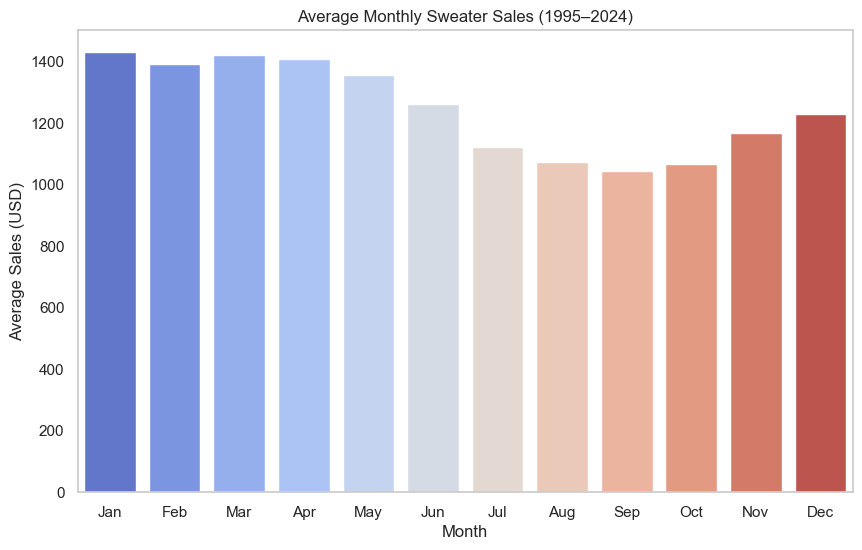


Average Sales by Month (USD):
 Month_Name
Jan    1430.86
Feb    1391.41
Mar    1422.18
Apr    1408.10
May    1355.72
Jun    1263.65
Jul    1123.23
Aug    1074.25
Sep    1044.82
Oct    1066.44
Nov    1169.78
Dec    1229.32
Name: New_Sales, dtype: float64


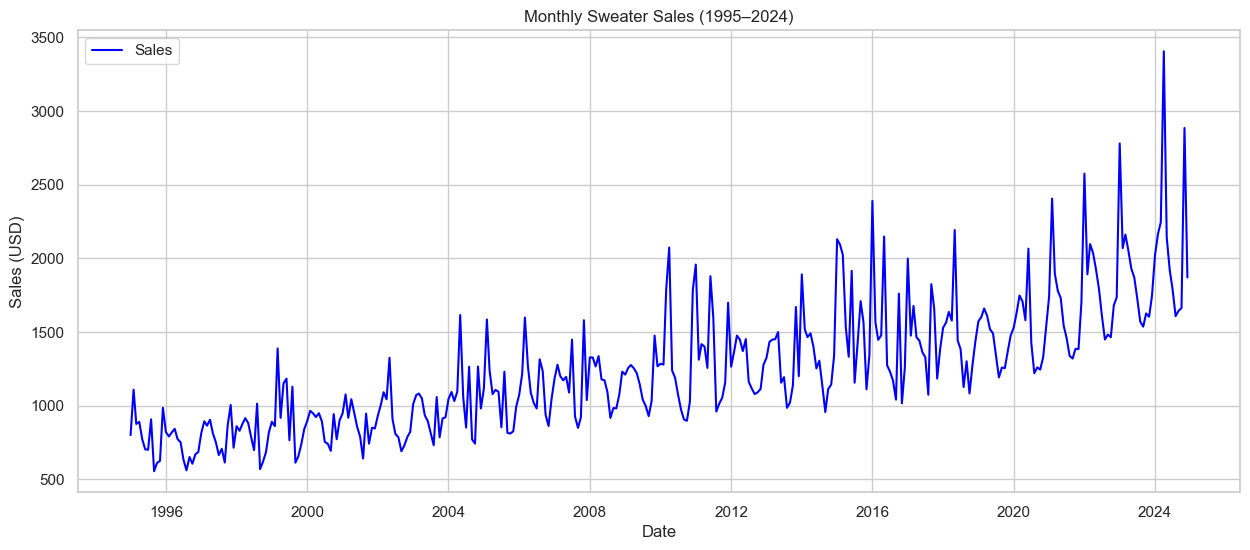

In [25]:
sales_df['Month_Name'] = sales_df['Date'].dt.strftime('%b')
monthly_avg = sales_df.groupby('Month_Name')['New_Sales'].mean().reindex(
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly Sweater Sales (1995–2024)')
plt.xlabel('Month')
plt.ylabel('Average Sales (USD)')
plt.grid(axis='y')
plt.show()
print("\nAverage Sales by Month (USD):\n", monthly_avg.round(2))

sales_df = sales_df.sort_values('Date')
plt.figure(figsize=(15, 6))
plt.plot(sales_df['Date'], sales_df['New_Sales'], label='Sales', color='blue')
plt.title('Monthly Sweater Sales (1995–2024)')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.legend()
plt.show()

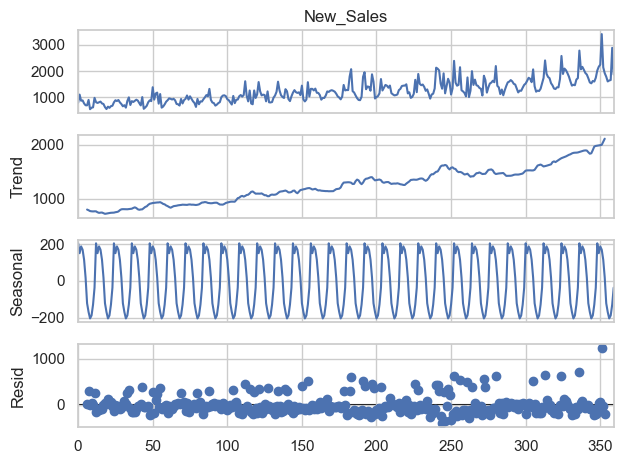

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(merged_df["New_Sales"], model="additive", period=12)
fig = decomposition.plot()
plt.show()


 Tổng quan: New_Sales (Toàn bộ dữ liệu)
--------------------------------------------------
Mean: 1248.31
Median: 1184.04
Std: 427.47
Min: 555.65
Max: 3404.43


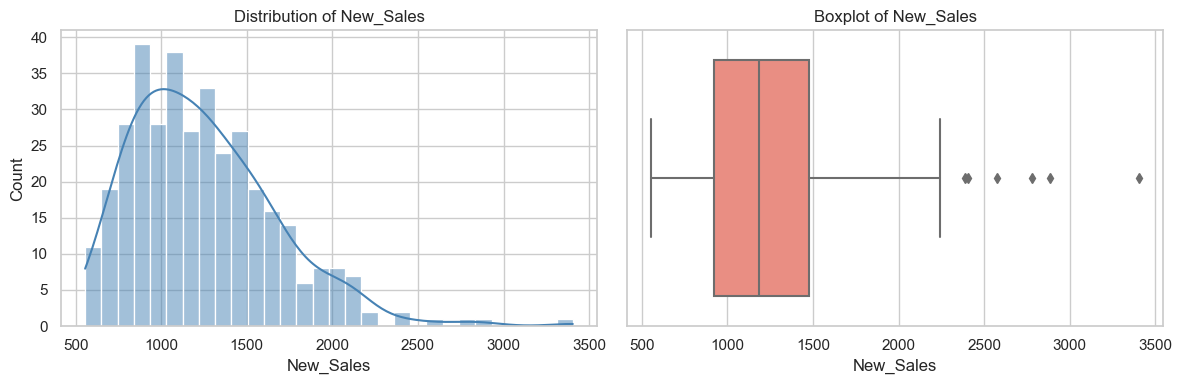


Tổng quan: Budget_USD (Chỉ tháng có promo)
--------------------------------------------------
Mean: 14462.96
Median: 16000.00
Std: 5999.10
Min: 5000.00
Max: 24000.00


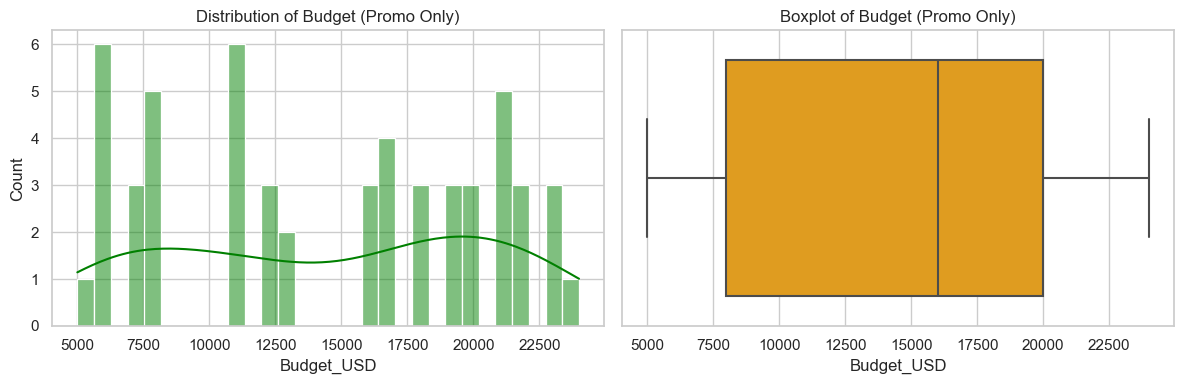

In [27]:
def univariate_sales_and_budget_analysis(df, bins=30):
    """
    Hiển thị:
    1. Distribution của New_Sales (tất cả tháng)
    2. Distribution của Budget_USD (chỉ các tháng có promo)
    """

    col_sales = 'New_Sales'
    print(f"\n Tổng quan: {col_sales} (Toàn bộ dữ liệu)")
    print("-" * 50)
    print(f"Mean: {df[col_sales].mean():.2f}")
    print(f"Median: {df[col_sales].median():.2f}")
    print(f"Std: {df[col_sales].std():.2f}")
    print(f"Min: {df[col_sales].min():.2f}")
    print(f"Max: {df[col_sales].max():.2f}")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col_sales], bins=bins, kde=True, color='steelblue')
    plt.title('Distribution of New_Sales')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col_sales], color='salmon')
    plt.title('Boxplot of New_Sales')
    plt.tight_layout()
    plt.show()

    promo_df = df[df['Promo_Type'] != 'Non_Promo']
    col_budget = 'Budget_USD'

    print(f"\nTổng quan: {col_budget} (Chỉ tháng có promo)")
    print("-" * 50)
    print(f"Mean: {promo_df[col_budget].mean():.2f}")
    print(f"Median: {promo_df[col_budget].median():.2f}")
    print(f"Std: {promo_df[col_budget].std():.2f}")
    print(f"Min: {promo_df[col_budget].min():.2f}")
    print(f"Max: {promo_df[col_budget].max():.2f}")

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(promo_df[col_budget], bins=bins, kde=True, color='green')
    plt.title('Distribution of Budget (Promo Only)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=promo_df[col_budget], color='orange')
    plt.title('Boxplot of Budget (Promo Only)')
    plt.tight_layout()
    plt.show()


univariate_sales_and_budget_analysis(merged_df)

## 2. Seasonality and Monthly Trends

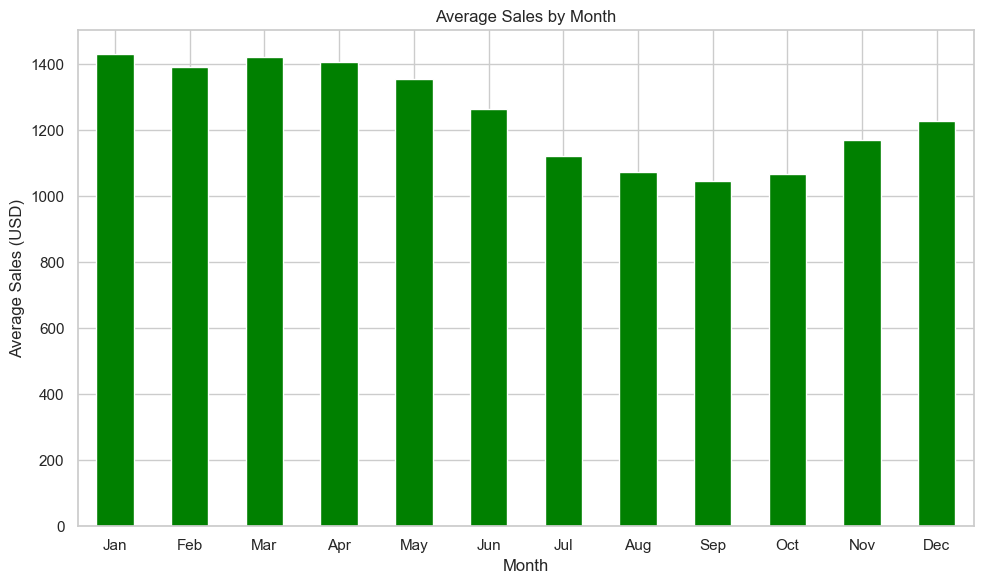

In [79]:
import calendar

monthly_sales = merged_df.groupby('Month')['New_Sales'].mean()
monthly_sales.index = [calendar.month_abbr[m] for m in monthly_sales.index]

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

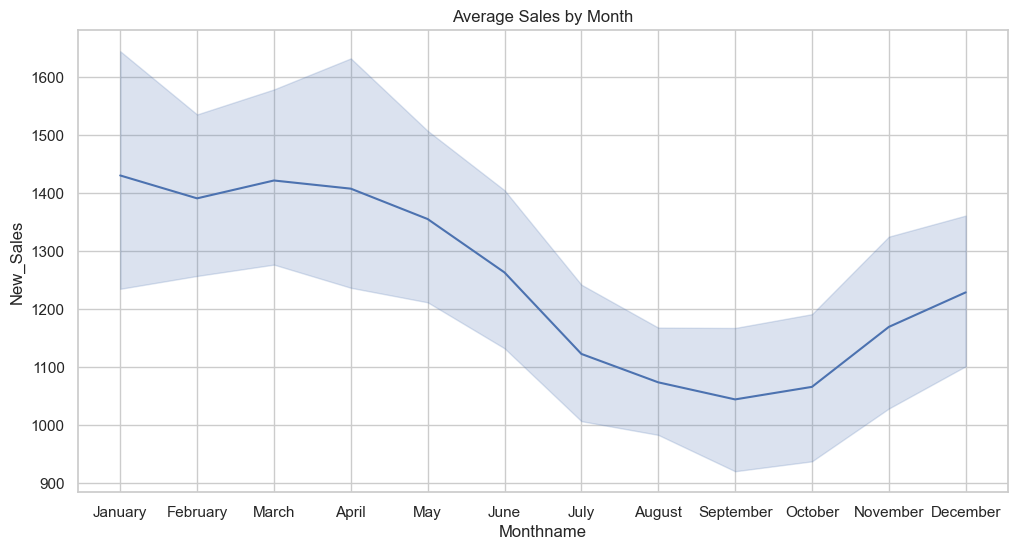

In [29]:
# Sales by month
merged_df["Monthname"] = merged_df["Date"].dt.month_name()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Monthname', y='New_Sales', data=merged_df, estimator='mean')
plt.title('Average Sales by Month')
plt.show()

## 3. Promotions: Type Frequency and Usage Over Time

<Figure size 1200x600 with 0 Axes>

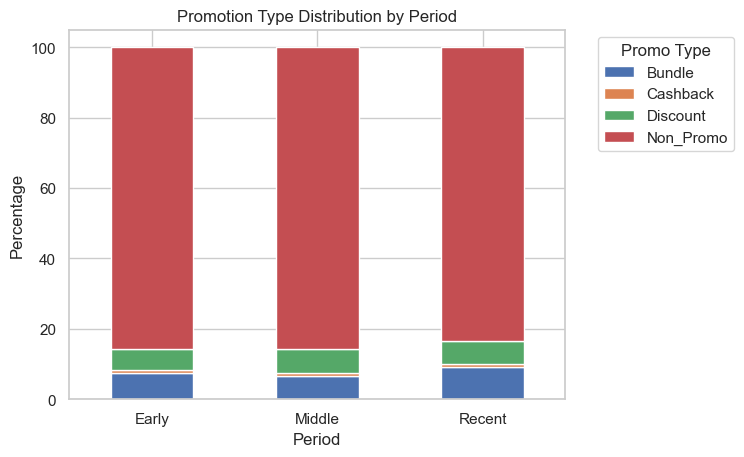

In [30]:
# Stacked Bar Plot of Promotion Types
merged_df["Period"] = merged_df["Year"].apply(lambda x: "Recent" if x >= 2015 else ("Middle" if x >= 2005 else "Early"))
promo_type_dist = merged_df.groupby(['Period', 'Promo_Type']).size().unstack(fill_value=0)
promo_type_dist = promo_type_dist.div(promo_type_dist.sum(axis=1), axis=0) * 100
promo_type_dist

plt.figure(figsize=(12, 6))
promo_type_dist.plot(kind='bar', stacked=True)
plt.title('Promotion Type Distribution by Period')
plt.xlabel('Period')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Promo Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

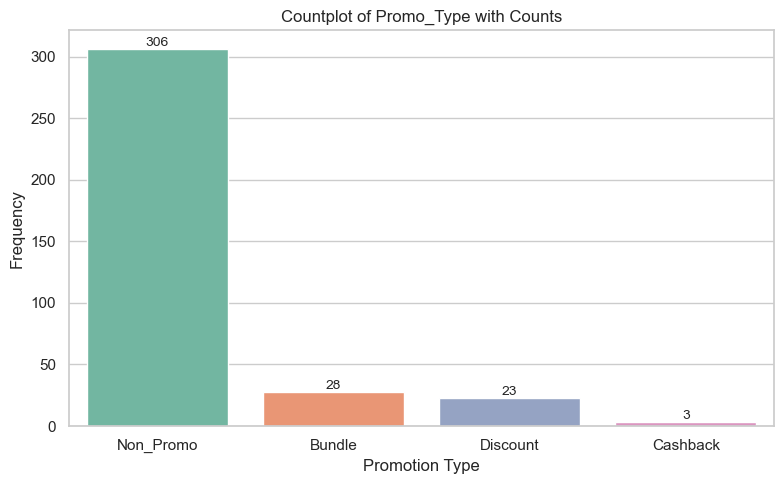

In [31]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=merged_df, x='Promo_Type', palette='Set2')

# Thêm số đếm trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom', fontsize=10)

plt.title('Countplot of Promo_Type with Counts')
plt.xlabel('Promotion Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

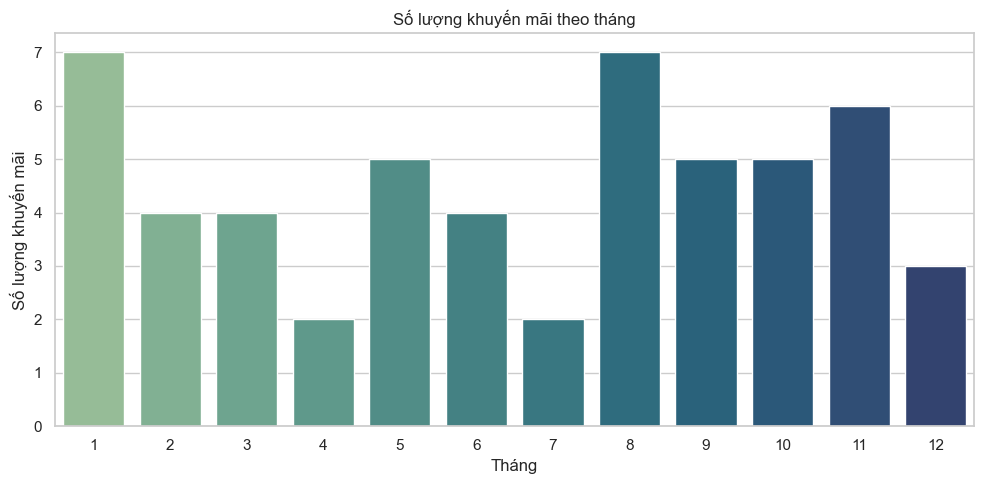

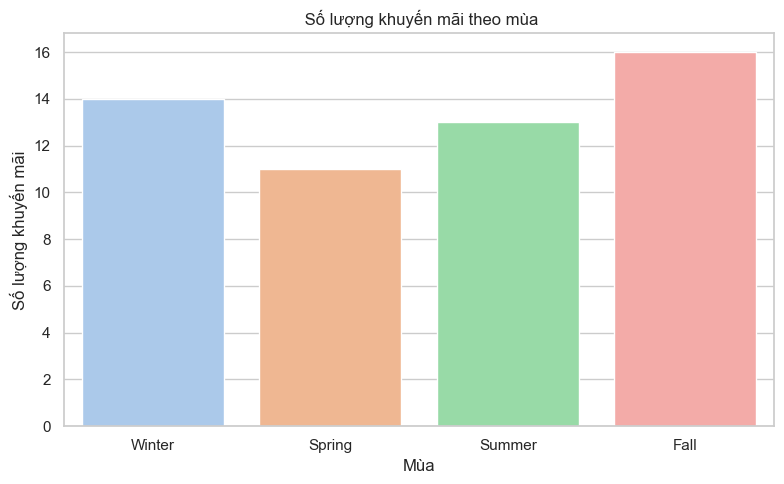

In [32]:
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()

promo_only['Season'] = promo_only['Month'].apply(lambda x:
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=promo_only, x='Month', palette='crest')
plt.title('Số lượng khuyến mãi theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng khuyến mãi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sns.countplot(data=promo_only, x='Season', order=season_order, palette='pastel')
plt.title(' Số lượng khuyến mãi theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Số lượng khuyến mãi')
plt.tight_layout()
plt.show()

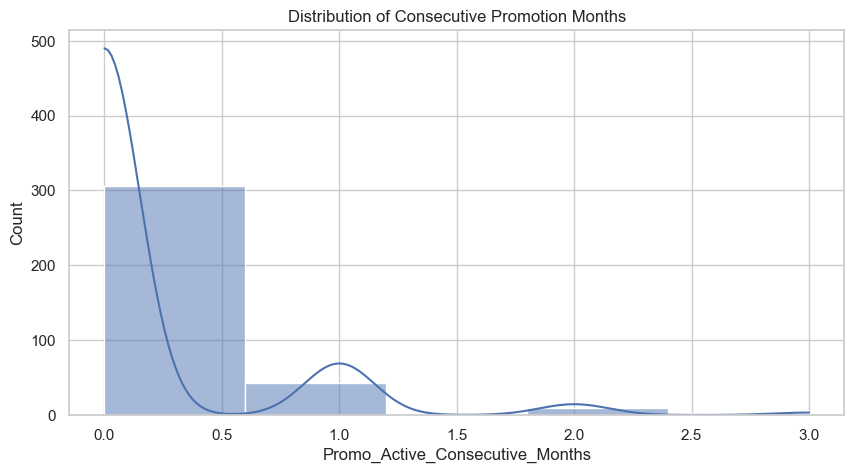

In [33]:
plt.figure(figsize=(10, 5))

test_conse = merged_df.copy()
promo = test_conse["Promo_Type"]

test_conse["Promo_Active_Consecutive_Months"] = 0

mask_current = promo != 'Non_Promo'
mask_shift1 = promo.shift(1) != 'Non_Promo'
mask_shift2 = promo.shift(2) != 'Non_Promo'

test_conse.loc[mask_current & mask_shift1 & mask_shift2, "Promo_Active_Consecutive_Months"] = 3
test_conse.loc[mask_current & mask_shift1 & (~mask_shift2), "Promo_Active_Consecutive_Months"] = 2
test_conse.loc[mask_current & (~mask_shift1), "Promo_Active_Consecutive_Months"] = 1

sns.histplot(test_conse['Promo_Active_Consecutive_Months'], bins=5, kde=True)
plt.title('Distribution of Consecutive Promotion Months')

plt.show()

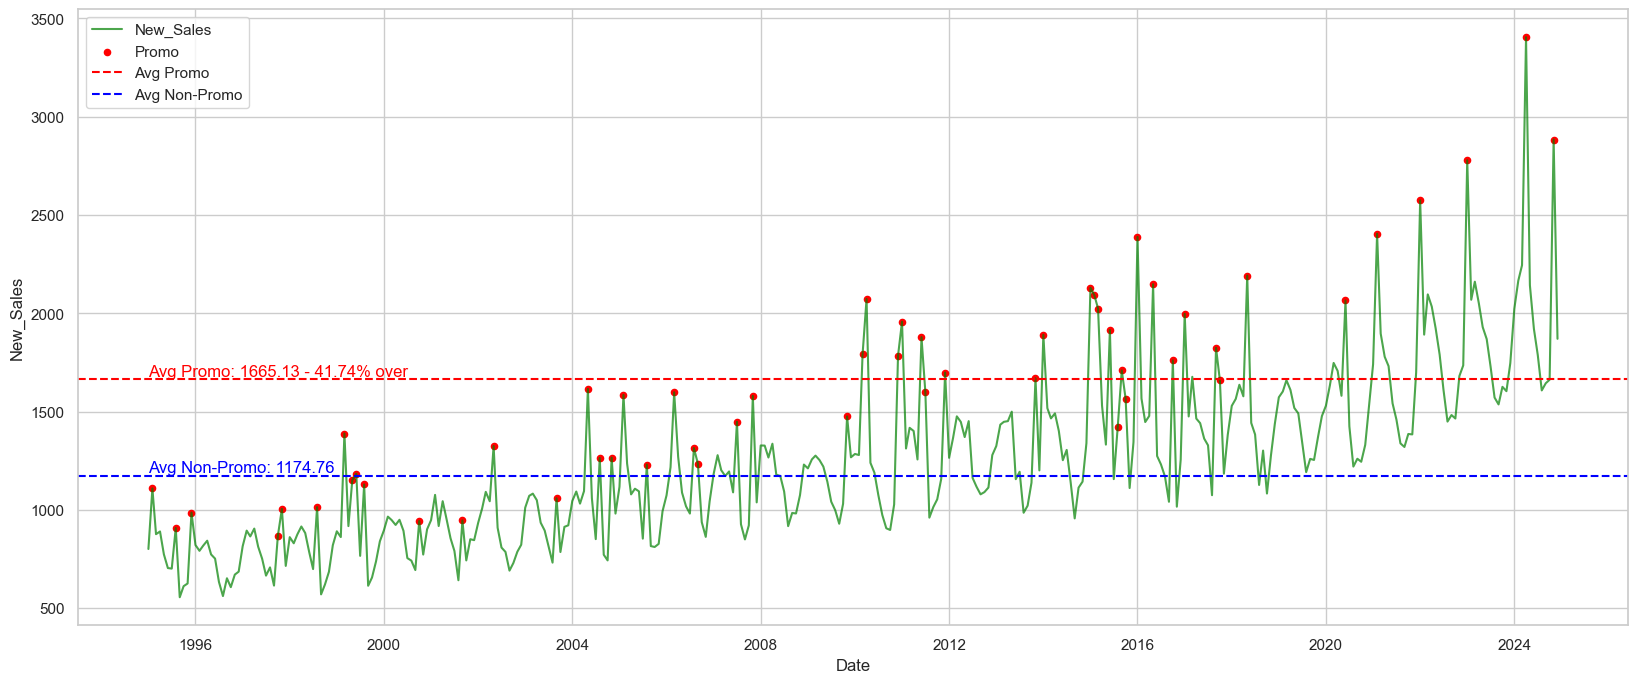

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=merged_df, x="Date", y="New_Sales", ax=ax, color= "green", alpha = 0.7, label="New_Sales")

merged_df["Has_Promo"] = merged_df["Promo_Type"].apply(lambda x: 1 if x != "Non_Promo" else 0)
promo = merged_df[merged_df["Has_Promo"] == 1]
ax.scatter(
    promo["Date"],
    promo["New_Sales"],
    s=20,      
    color="red",
    marker="o",
    label="Promo"
)
nonpromo = merged_df[merged_df["Has_Promo"] == 0]
avg_sales_promo = promo["New_Sales"].mean() 
avg_sales_nonpromo = nonpromo["New_Sales"].mean()

x_start = merged_df["Date"].min()
ax.axhline(avg_sales_promo, color="red", linestyle="--", label=f"Avg Promo")
ax.axhline(avg_sales_nonpromo, color="blue", linestyle="--", label=f"Avg Non-Promo")
ax.text(x_start, avg_sales_promo, f"Avg Promo: {avg_sales_promo:.2f} - {(avg_sales_promo/avg_sales_nonpromo-1)*100:.2f}% over", ha="left", va="bottom", color = "red")
ax.text(x_start, avg_sales_nonpromo, f"Avg Non-Promo: {avg_sales_nonpromo:.2f}", ha="left", va="bottom", color = "blue")
ax.legend()
plt.show()

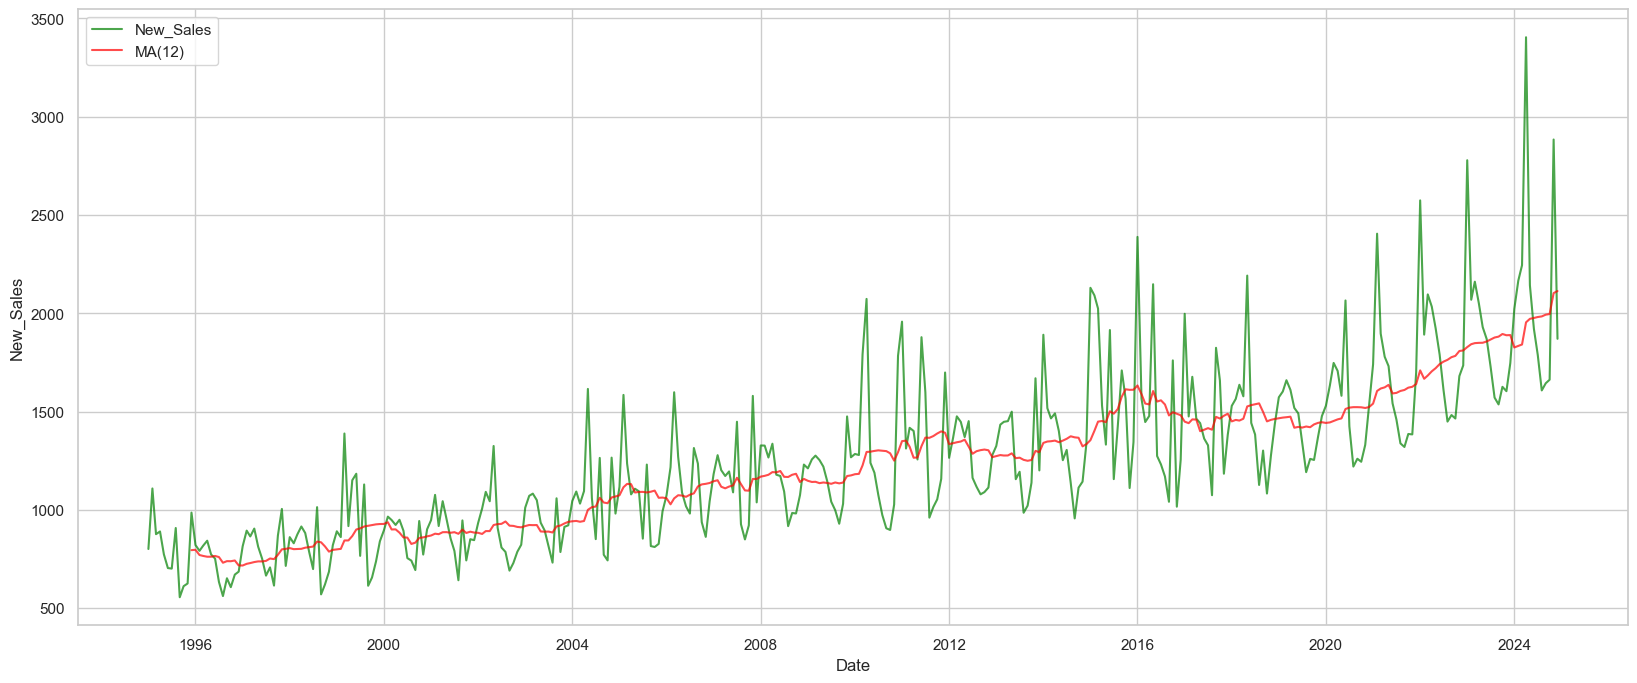

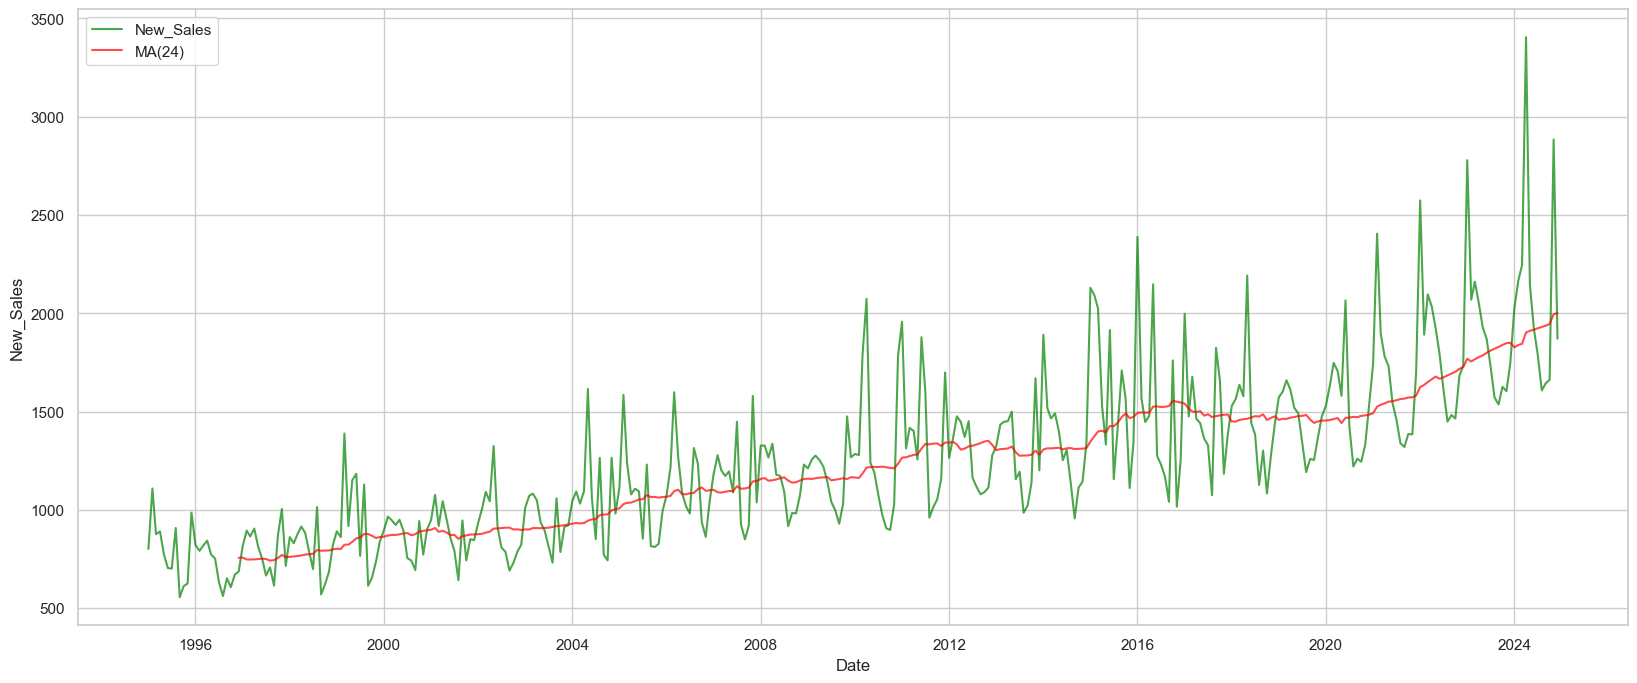

In [35]:
sales_performance = MultiVarAnalysisProcessor(MAAnalysis())
# sales_performance.set_strategy(MAAnalysis())
sales_performance.analysis(data=merged_df, time_col="Date", target_col="New_Sales", n=12)
sales_performance.analysis(data=merged_df, time_col="Date", target_col="New_Sales", n=24)

## 4. Promotion Effectiveness by Type and Season

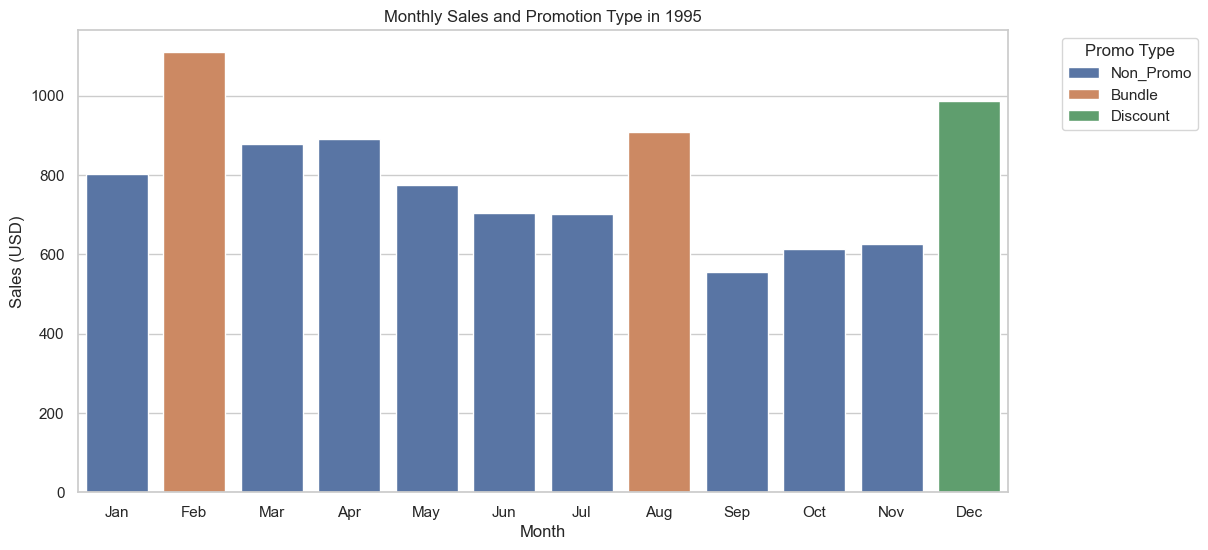

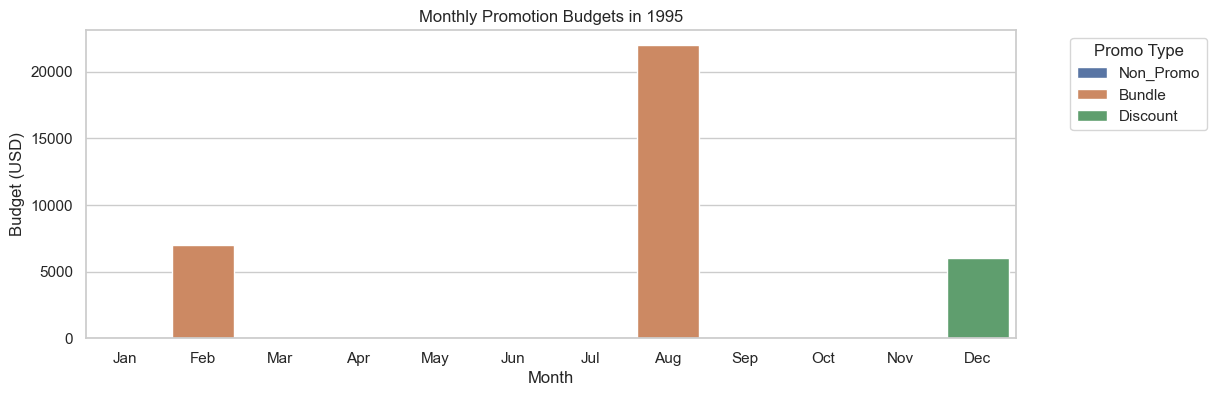

In [36]:
# Filter for 1995 only
merged_1995 = merged_df[merged_df['Date'].dt.year == 1995].copy()
merged_1995['Month'] = merged_1995['Date'].dt.strftime('%b')

# Sort months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
merged_1995['Month'] = pd.Categorical(merged_1995['Month'], categories=month_order, ordered=True)
merged_1995 = merged_1995.sort_values('Month')

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_1995, x='Month', y='New_Sales', hue='Promo_Type', width=0.8, dodge=False)
plt.title('Monthly Sales and Promotion Type in 1995')
plt.ylabel('Sales (USD)')
plt.xlabel('Month')
plt.legend(title='Promo Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 4))
sns.barplot(data=merged_1995, x='Month', y='Budget_USD', hue='Promo_Type', width=0.8, dodge=False)
plt.title('Monthly Promotion Budgets in 1995')
plt.ylabel('Budget (USD)')
plt.xlabel('Month')
plt.legend(title='Promo Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### General Sales Trend

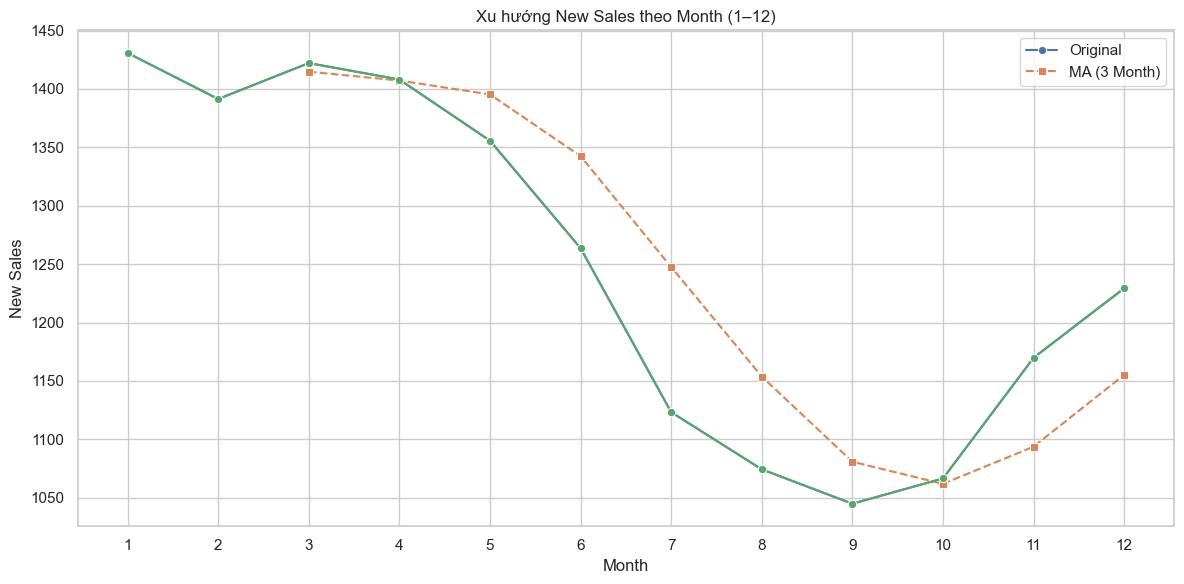

In [37]:
monthly_avg = merged_df.groupby('Month')['New_Sales'].mean().reset_index()

# MA 3 months
monthly_avg['MA_3'] = monthly_avg['New_Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='New_Sales', label='Original', marker='o')
sns.lineplot(data=monthly_avg, x='Month', y='MA_3', label='MA (3 Month)', marker='s', linestyle='--')

plt.title('Xu hướng New Sales theo Month (1–12)')
plt.xlabel('Month')
plt.ylabel('New Sales')
plt.xticks(ticks=range(1, 13), labels=[str(m) for m in range(1, 13)])
plt.grid(True)
plt.legend()
plt.tight_layout()
sns.lineplot(data=monthly_avg, x='Month', y='New_Sales', marker='o')
plt.show()

### Effectiveness of each Promotion Type Seasonally

In [38]:
merged_df.head()

,Date,New_Sales,Promo_Type,Budget_USD,Month,Year,Quarter,Monthname,Period,Has_Promo
0,1995-01-01,801.087735,Non_Promo,0.0,1,1995,1,January,Early,0
1,1995-02-01,1109.019328,Bundle,7000.0,2,1995,1,February,Early,1
2,1995-03-01,876.561180,Non_Promo,0.0,3,1995,1,March,Early,0
3,1995-04-01,890.258213,Non_Promo,0.0,4,1995,2,April,Early,0
4,1995-05-01,774.015130,Non_Promo,0.0,5,1995,2,May,Early,0



Loại Khuyến mãi có Doanh số trung bình cao nhất theo từng Mùa:


,Season,Promo_Type,New_Sales
4,Spring,Cashback,2109.36
10,Winter,Bundle,2014.59
1,Fall,Discount,1748.47
8,Summer,Discount,1444.02


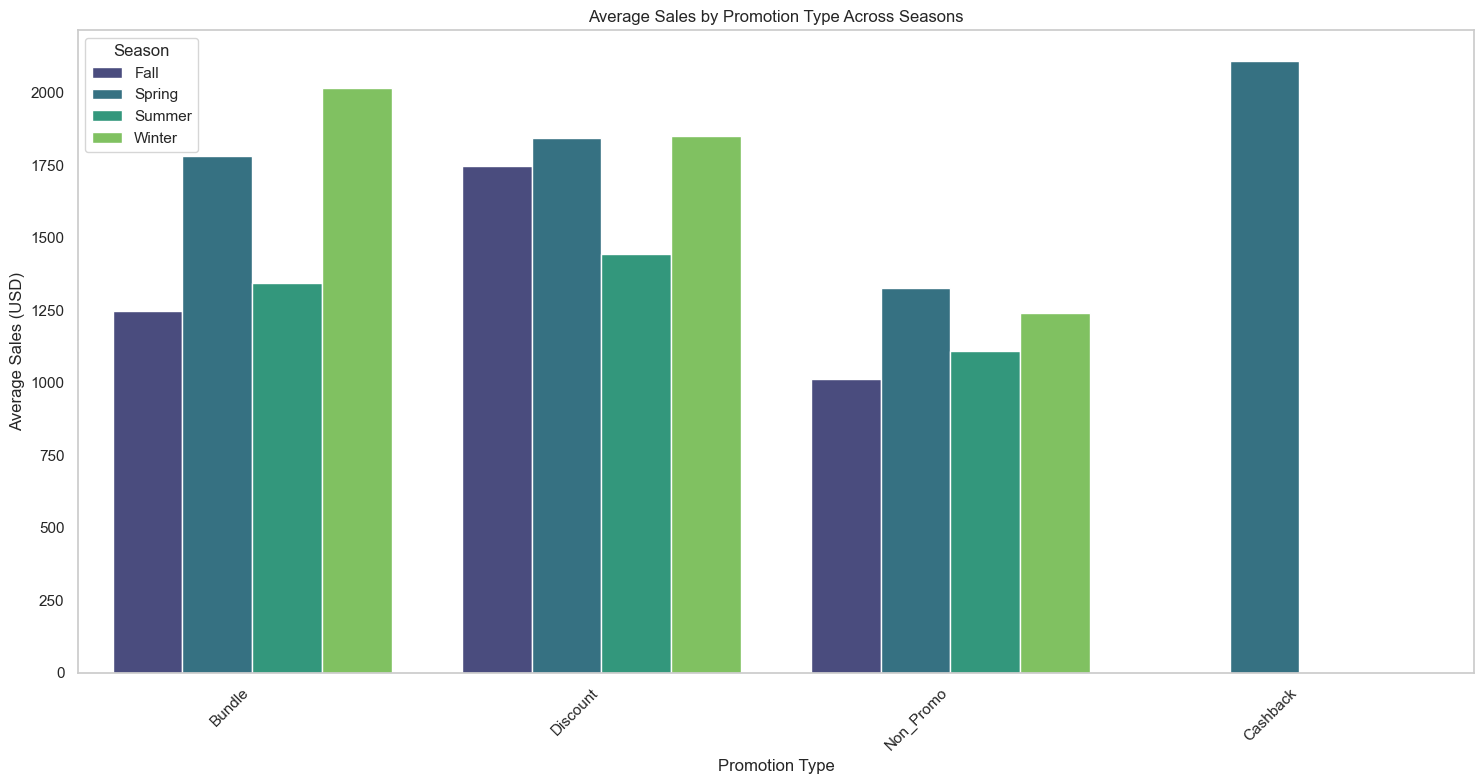

In [39]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

merged_df['Season'] = merged_df['Month'].apply(get_season)
seasonal_promo_sales = merged_df.groupby(['Season', 'Promo_Type'])['New_Sales'].mean().reset_index()

idx_max_sales = seasonal_promo_sales.groupby('Season')['New_Sales'].idxmax()
best_promo_per_season = seasonal_promo_sales.loc[idx_max_sales]
print("\nLoại Khuyến mãi có Doanh số trung bình cao nhất theo từng Mùa:")
display(best_promo_per_season.sort_values(by='New_Sales', ascending=False).round(2))

plt.figure(figsize=(15, 8))
sns.barplot(data=seasonal_promo_sales, x='Promo_Type', y='New_Sales', hue='Season', palette='viridis')
plt.title("Average Sales by Promotion Type Across Seasons")
plt.xlabel("Promotion Type")
plt.ylabel("Average Sales (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Promotional Influences on Sales

 Phân tích hiệu quả từng loại khuyến mãi:
╒════╤══════════════╤═════════════════════╤══════════════╤════════════════╤════════════════════╤═════════════╤═══════════════╤═════════════════════╕
│    │ Promo_Type   │   Avg_Change_Before │   Std_Before │   Count_Before │   Avg_Change_After │   Std_After │   Count_After │   Most_Common_Month │
╞════╪══════════════╪═════════════════════╪══════════════╪════════════════╪════════════════════╪═════════════╪═══════════════╪═════════════════════╡
│  2 │ Discount     │               53.79 │      14.5546 │             13 │             -34.15 │     9.39986 │            13 │                   8 │
├────┼──────────────┼─────────────────────┼──────────────┼────────────────┼────────────────────┼─────────────┼───────────────┼─────────────────────┤
│  0 │ Bundle       │               47.01 │      11.0406 │             18 │             -27.06 │     6.83126 │            18 │                   1 │
├────┼──────────────┼─────────────────────┼──────────────┼──────

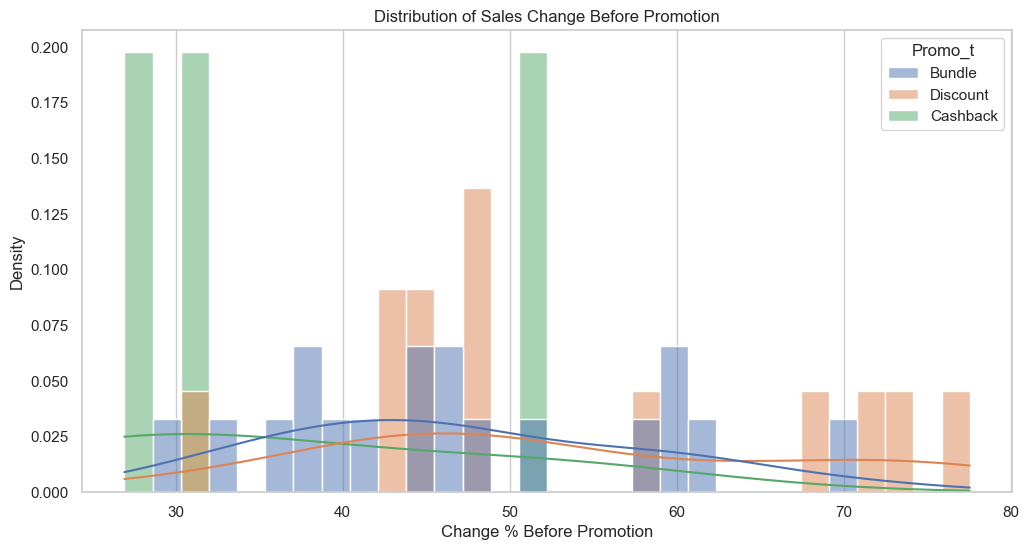

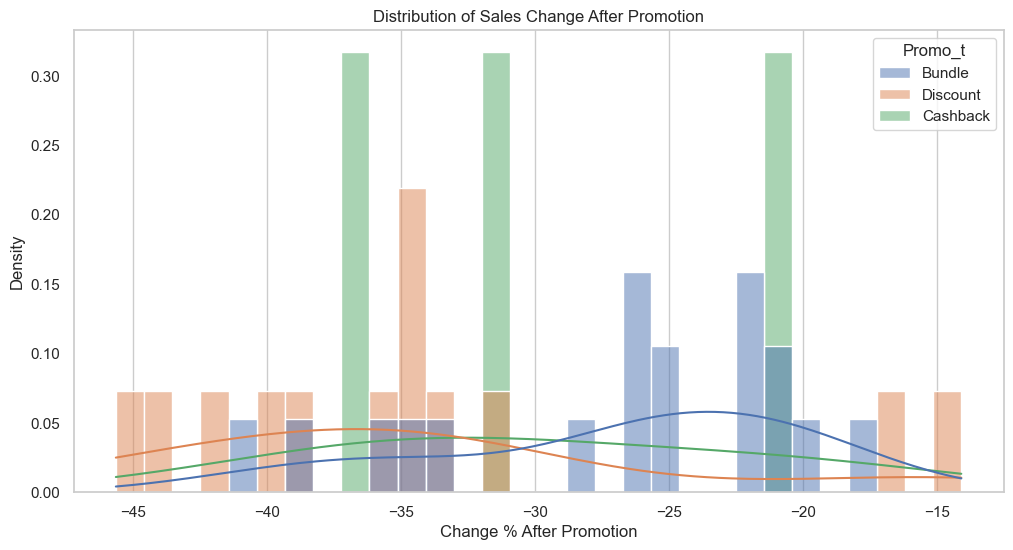

In [40]:
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# Tạo doanh số tháng trước và sau
df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Sales_t+1'] = df['New_Sales'].shift(-1)

# Gắn promo tháng trước và sau
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)
df['Promo_t+1'] = df['Promo_Type'].shift(-1)

promo_only = df[df['Promo_t'] != 'Non_Promo'].copy()
promo_only = promo_only.dropna(subset=['Sales_t-1', 'Sales_t+1', 'Budget_USD'])

promo_only = promo_only[
(promo_only['Promo_t-1'] == 'Non_Promo') &
(promo_only['Promo_t+1'] == 'Non_Promo')
].copy()

# Tính % thay đổi trước và sau
promo_only['Change_%_Before'] = ((promo_only['New_Sales'] - promo_only['Sales_t-1']) / promo_only['Sales_t-1']) * 100
promo_only['Change_%_After'] = ((promo_only['Sales_t+1'] - promo_only['New_Sales']) / promo_only['New_Sales']) * 100
promo_only['Month'] = promo_only['Month'].astype(int)

summary = promo_only.groupby('Promo_t').agg({'Change_%_Before': ['mean', 'std', 'count'],'Change_%_After': ['mean', 'std', 'count'],'Month': lambda x: x.value_counts().idxmax() # Tháng xuất hiện nhiều nhất
}).reset_index()
# Đặt tên cột cho rõ ràng
summary.columns = ['Promo_Type','Avg_Change_Before', 'Std_Before', 'Count_Before','Avg_Change_After', 'Std_After', 'Count_After','Most_Common_Month']

# Làm tròn cho dễ đọc
summary[['Avg_Change_Before', 'Avg_Change_After']] = summary[['Avg_Change_Before', 'Avg_Change_After']].round(2)
print(" Phân tích hiệu quả từng loại khuyến mãi:")

print(tabulate(summary.sort_values(by='Avg_Change_Before', ascending=False), headers='keys', tablefmt='fancy_grid'))

# Vẽ biểu đồ phân phối % thay đổi trước và sau khuyến mãi
plt.figure(figsize=(12, 6))
sns.histplot(promo_only, x='Change_%_Before', hue='Promo_t', kde=True, stat='density', common_norm=False, bins=30)
plt.title('Distribution of Sales Change Before Promotion')
plt.xlabel('Change % Before Promotion')
plt.ylabel('Density')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(promo_only, x='Change_%_After', hue='Promo_t', kde=True, stat='density', common_norm=False, bins=30)
plt.title('Distribution of Sales Change After Promotion')
plt.xlabel('Change % After Promotion')
plt.ylabel('Density')
plt.grid(axis='y')
plt.show()

### Changes in Sales before and after Promotion Months

In [41]:
check_promo_eff = merged_df.sort_values(by=['Year', 'Month']).copy()

check_promo_eff['Has_Promo'] = (check_promo_eff['Promo_Type'] != 'Non_Promo').astype(int)
check_promo_eff['Time_ID'] = pd.to_datetime(check_promo_eff[['Year', 'Month']].assign(DAY=1))

# prev month sales
check_promo_eff['Prev_Sales'] = check_promo_eff['New_Sales'].shift(1)
check_promo_eff['Prev_Has_Promo'] = check_promo_eff['Has_Promo'].shift(1)
check_promo_eff['Prev_Year'] = check_promo_eff['Year'].shift(1)
check_promo_eff['Prev_Month'] = check_promo_eff['Month'].shift(1)

check_promo_eff['Next_Sales'] = check_promo_eff['New_Sales'].shift(-1)
check_promo_eff['Next_Has_Promo'] = check_promo_eff['Has_Promo'].shift(-1)
check_promo_eff['Next_Year'] = check_promo_eff['Year'].shift(-1)
check_promo_eff['Next_Month'] = check_promo_eff['Month'].shift(-1)

# check consecutive months
def is_prev_month(y1, m1, y2, m2):
    return (y1 == y2 and m1 - 1 == m2) or (y1 - 1 == y2 and m1 == 1 and m2 == 12)

def is_next_month(y1, m1, y2, m2):
    return (y1 == y2 and m1 + 1 == m2) or (y1 + 1 == y2 and m1 == 12 and m2 == 1)

mask = (
    (check_promo_eff['Has_Promo'] == 1) &
    (check_promo_eff['Prev_Has_Promo'] == 0) &
    (check_promo_eff['Next_Has_Promo'] == 0) &
    check_promo_eff.apply(lambda row: is_prev_month(row['Year'], row['Month'], row['Prev_Year'], row['Prev_Month']), axis=1) &
    check_promo_eff.apply(lambda row: is_next_month(row['Year'], row['Month'], row['Next_Year'], row['Next_Month']), axis=1)
)

df = check_promo_eff[mask].copy()
df['Change_%_Before'] = ((df['New_Sales'] - df['Prev_Sales']) / df['Prev_Sales']) * 100
df['Change_%_After'] = ((df['Next_Sales'] - df['New_Sales']) / df['New_Sales']) * 100

# Làm tròn
df['Change_%_Before'] = df['Change_%_Before'].round(2)
df['Change_%_After'] = df['Change_%_After'].round(2)

result = df[['Year', 'Month', 'Promo_Type',  'Change_%_Before', 'Change_%_After']]

print("Các tháng có promo đơn lẻ (trước và sau không promo):")
print(tabulate(result.tail(20), headers='keys', tablefmt='fancy_grid'))

Các tháng có promo đơn lẻ (trước và sau không promo):
╒═════╤════════╤═════════╤══════════════╤═══════════════════╤══════════════════╕
│     │   Year │   Month │ Promo_Type   │   Change_%_Before │   Change_%_After │
╞═════╪════════╪═════════╪══════════════╪═══════════════════╪══════════════════╡
│ 127 │   2005 │       8 │ Discount     │             44.13 │           -33.69 │
├─────┼────────┼─────────┼──────────────┼───────────────────┼──────────────────┤
│ 134 │   2006 │       3 │ Cashback     │             31.31 │           -20.55 │
├─────┼────────┼─────────┼──────────────┼───────────────────┼──────────────────┤
│ 150 │   2007 │       7 │ Bundle       │             32.98 │           -36    │
├─────┼────────┼─────────┼──────────────┼───────────────────┼──────────────────┤
│ 154 │   2007 │      11 │ Discount     │             71.5  │           -34.29 │
├─────┼────────┼─────────┼──────────────┼───────────────────┼──────────────────┤
│ 178 │   2009 │      11 │ Discount     │             4

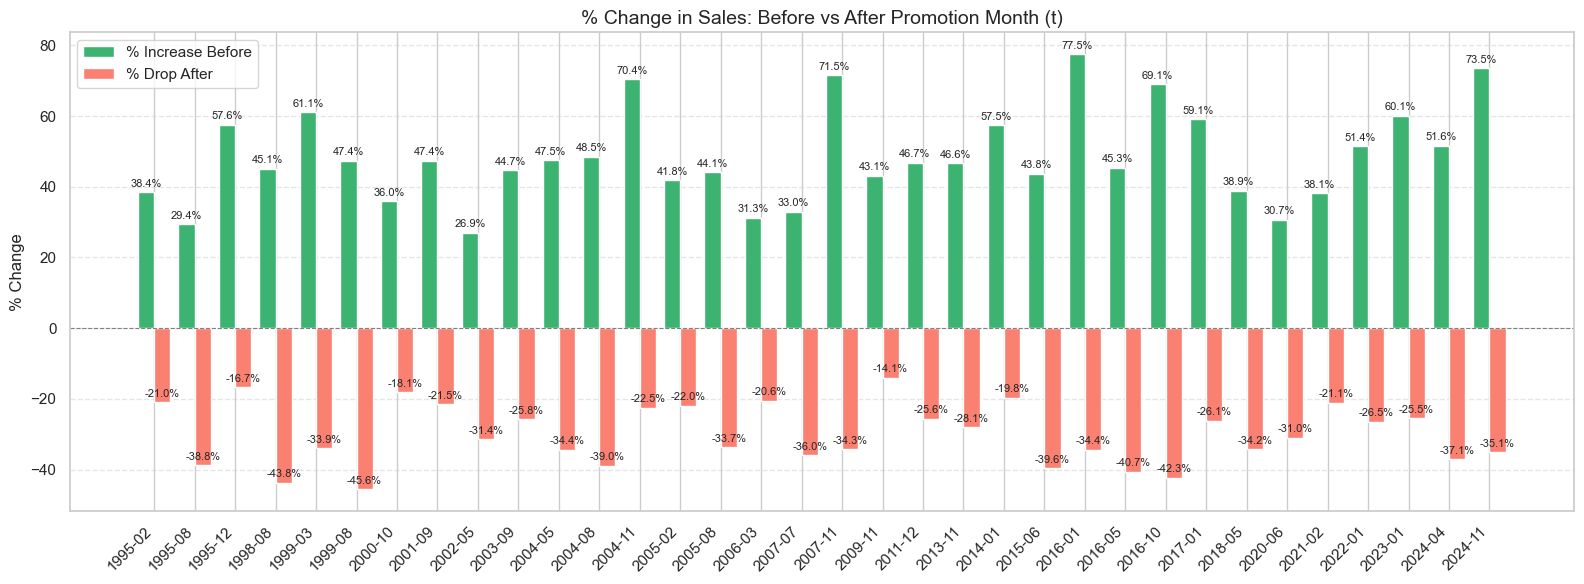

In [42]:
labels = [f"{int(y)}-{int(m):02d}" for y, m in zip(result['Year'], result['Month'])]
x = np.arange(len(labels))

before = result['Change_%_Before']
after = result['Change_%_After']

plt.figure(figsize=(16, 6))
bar1 = plt.bar(x - 0.2, before, width=0.4, label='% Increase Before', color='mediumseagreen')
bar2 = plt.bar(x + 0.2, after, width=0.4, label='% Drop After', color='salmon')

for i in range(len(x)):
    plt.text(x[i] - 0.2, before.iloc[i] + 1, f"{before.iloc[i]:.1f}%", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + 0.2, after.iloc[i] + 1, f"{after.iloc[i]:.1f}%", ha='center', va='bottom', fontsize=8)

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('% Change')
plt.title('% Change in Sales: Before vs After Promotion Month (t)', fontsize=14)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### T-test between Promo and Non-Promo Sales

In [44]:
merged_df.tail()

,Date,New_Sales,Promo_Type,Budget_USD,Month,Year,Quarter,Monthname,Period,Has_Promo,Season
355,2024-08-01,1607.835902,Non_Promo,0.0,8,2024,3,August,Recent,0,Summer
356,2024-09-01,1644.318122,Non_Promo,0.0,9,2024,3,September,Recent,0,Fall
357,2024-10-01,1662.271517,Non_Promo,0.0,10,2024,4,October,Recent,0,Fall
358,2024-11-01,2884.201446,Discount,23000.0,11,2024,4,November,Recent,1,Fall
359,2024-12-01,1870.375540,Non_Promo,0.0,12,2024,4,December,Recent,0,Winter


In [43]:
from scipy.stats import ttest_ind


promo_sales = merged_df[merged_df['Promo_Type'] != 'Non_Promo']['New_Sales']
no_promo_sales = merged_df[merged_df['Promo_Type'] == 'Non_Promo']['New_Sales']
t_stat, p_val = ttest_ind(promo_sales, no_promo_sales, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


T-statistic: 6.392869480292723
P-value: 2.482535203133631e-08


## 5. Promotional Budget and Sales Correlation

╒════╤═════════════╤══════════════╤════════════════╤═══════════════╕
│    │ Monthname   │ Promo_Type   │   total_budget │   total_sales │
╞════╪═════════════╪══════════════╪════════════════╪═══════════════╡
│  0 │ April       │ Non_Promo    │              0 │       890.258 │
├────┼─────────────┼──────────────┼────────────────┼───────────────┤
│  1 │ August      │ Bundle       │          22000 │       907.926 │
├────┼─────────────┼──────────────┼────────────────┼───────────────┤
│  2 │ December    │ Discount     │           6000 │       986.183 │
├────┼─────────────┼──────────────┼────────────────┼───────────────┤
│  3 │ February    │ Bundle       │           7000 │      1109.02  │
├────┼─────────────┼──────────────┼────────────────┼───────────────┤
│  4 │ January     │ Non_Promo    │              0 │       801.088 │
├────┼─────────────┼──────────────┼────────────────┼───────────────┤
│  5 │ July        │ Non_Promo    │              0 │       701.414 │
├────┼─────────────┼──────────────

[Text(0, 0, 'April'),
 Text(1, 0, 'August'),
 Text(2, 0, 'December'),
 Text(3, 0, 'February'),
 Text(4, 0, 'January'),
 Text(5, 0, 'July'),
 Text(6, 0, 'June'),
 Text(7, 0, 'March'),
 Text(8, 0, 'May'),
 Text(9, 0, 'November'),
 Text(10, 0, 'October'),
 Text(11, 0, 'September')]

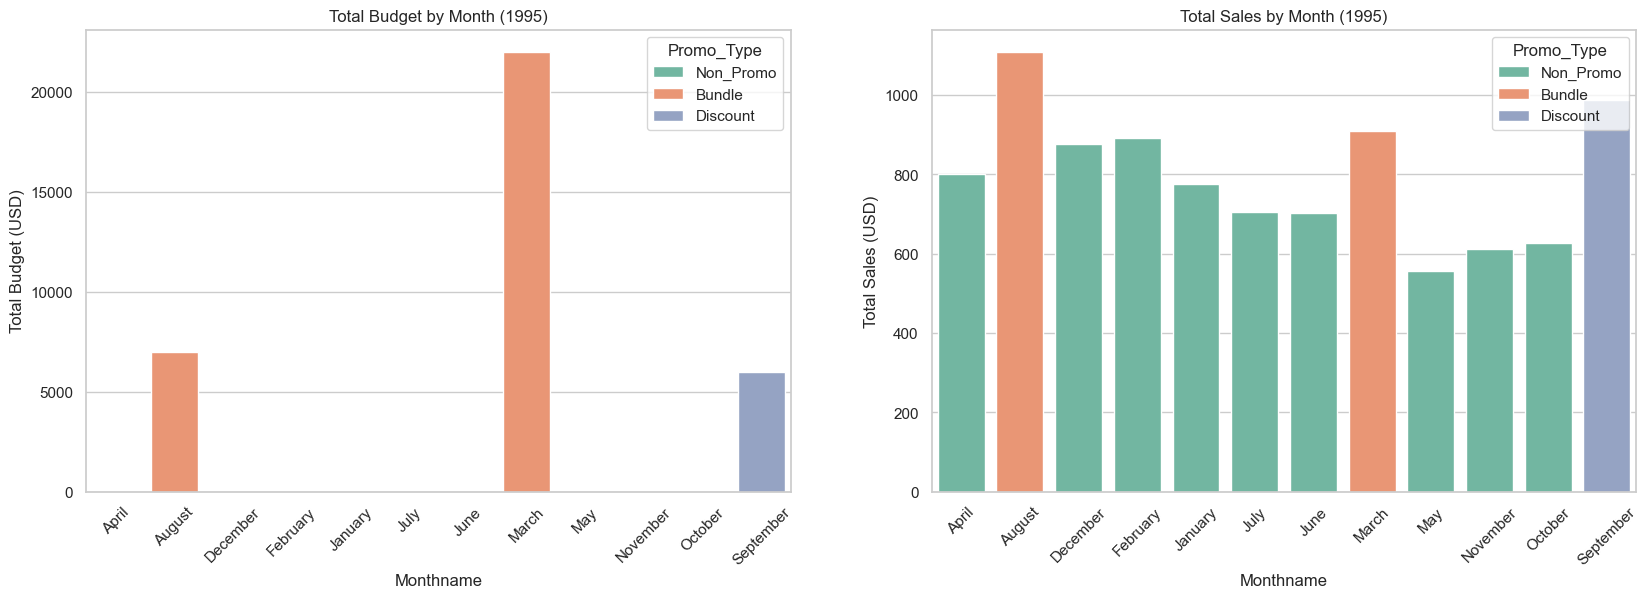

In [78]:
# Comparing Promo vs. Non-Promo Months (1995)

df_1995 = merged_df[merged_df['Year'] == 1995].copy()

df_95_grouped = df_1995.groupby(["Monthname", "Promo_Type"]).agg(
    total_budget = ("Budget_USD", "first"),
    total_sales = ("New_Sales", "first")
).reset_index().sort_values(by=["Monthname", "Promo_Type"])

print(tabulate(df_95_grouped, headers='keys', tablefmt='fancy_grid'))

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

order = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
df_95_grouped['Monthname'] = pd.Categorical(df_95_grouped['Monthname'], categories=order, ordered=True)

sns.barplot(data=df_95_grouped, x='Monthname', y='total_budget', hue='Promo_Type', ax=axes[0], palette='Set2', width=0.8, dodge=False)
sns.barplot(data=df_95_grouped, x='Monthname', y='total_sales', hue='Promo_Type', ax=axes[1], palette='Set2', width=0.8, dodge=False)
axes[0].set_title('Total Budget by Month (1995)')
axes[1].set_title('Total Sales by Month (1995)')
axes[0].set_ylabel('Total Budget (USD)')
axes[1].set_ylabel('Total Sales (USD)')
axes[0].set_xticklabels(df_95_grouped['Monthname'].unique(), rotation=45)
axes[1].set_xticklabels(df_95_grouped['Monthname'].unique(), rotation=45)

### Correlation between budget and sales by season and by type of promotion

(360, 11)


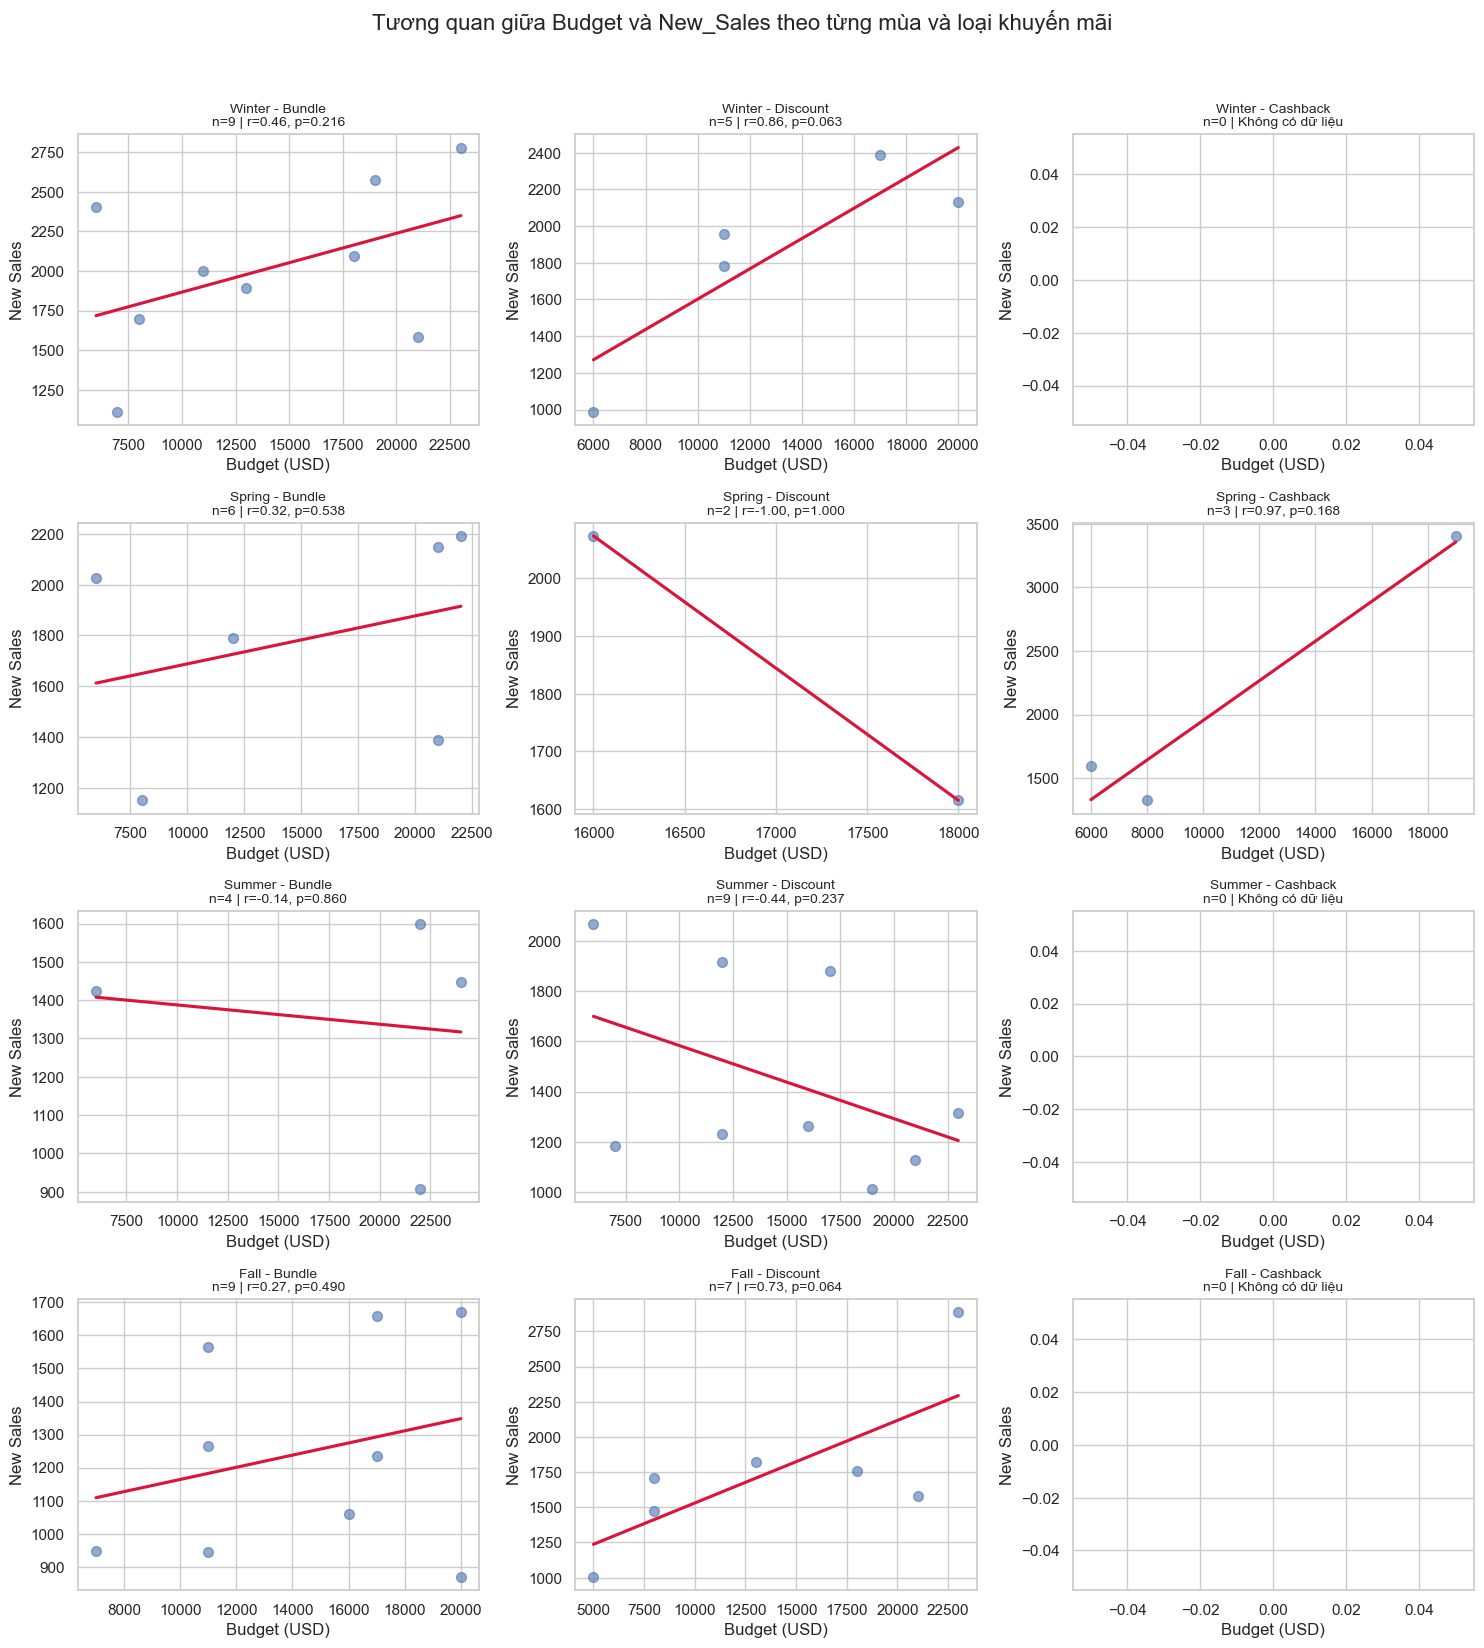

(360, 11)


In [ ]:
from scipy.stats import pearsonr

# print(merged_df.shape)

def plot_correlation_by_season_and_promo(df, budget_col='Budget_USD', sales_col='New_Sales'):
    df = df[df['Promo_Type'] != 'Non_Promo'].copy()
    df = df.dropna(subset=[budget_col, sales_col, 'Season'])

    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    promo_types = df['Promo_Type'].unique()
    num_cols = len(promo_types)
    num_rows = len(seasons)

    plt.figure(figsize=(5 * num_cols, 4.2 * num_rows))

    plot_index = 1
    for i, season in enumerate(seasons):
        for j, promo in enumerate(promo_types):
            subset = df[(df['Season'] == season) & (df['Promo_Type'] == promo)]

            plt.subplot(num_rows, num_cols, plot_index)

            if len(subset) >= 2:
                r, p = pearsonr(subset[budget_col], subset[sales_col])
                title = f"{season} - {promo}\nn={len(subset)} | r={r:.2f}, p={p:.3f}"
            elif len(subset) == 1:
                title = f"{season} - {promo}\nn=1 | Không đủ dữ liệu"
            else:
                title = f"{season} - {promo}\nn=0 | Không có dữ liệu"

            sns.regplot(
                data=subset,
                x=budget_col,
                y=sales_col,
                scatter_kws={'s': 50, 'alpha': 0.6},
                line_kws={'color': 'crimson'},
                ci=None
            )
            plt.title(title, fontsize=10)
            plt.xlabel("Budget (USD)")
            plt.ylabel("New Sales")
            plt.grid(True)

            plot_index += 1

    plt.suptitle("Tương quan giữa Budget và New_Sales theo từng mùa và loại khuyến mãi", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_correlation_by_season_and_promo(merged_df)

### Budget allocation for promotion seasonally

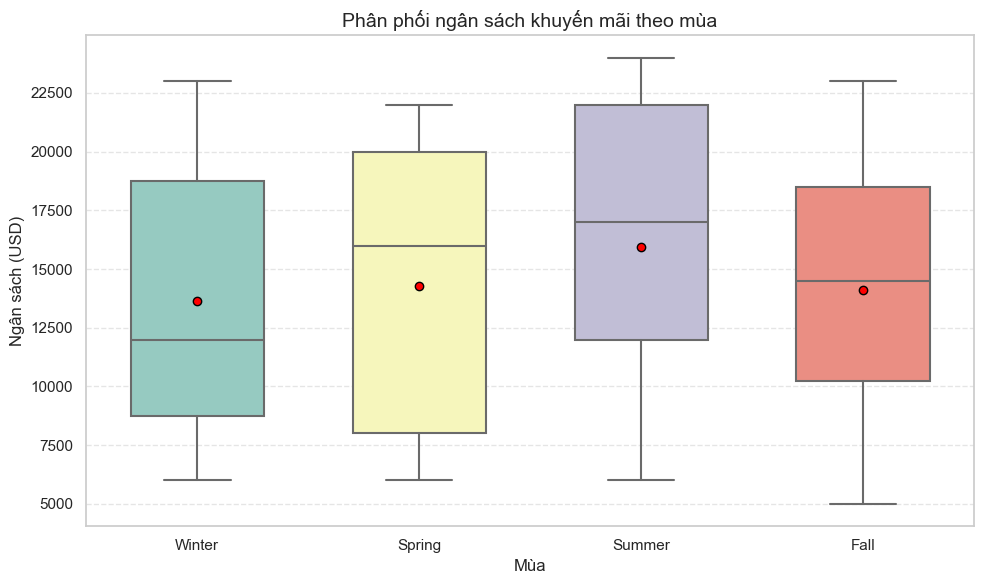

In [52]:
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
promo_only['Season'] = pd.Categorical(promo_only['Season'], categories=season_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(
data=promo_only,
x='Season',
y='Budget_USD',
palette='Set3',
width=0.6,
showmeans=True,
meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

plt.title('Phân phối ngân sách khuyến mãi theo mùa', fontsize=14)
plt.xlabel('Mùa')
plt.ylabel('Ngân sách (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

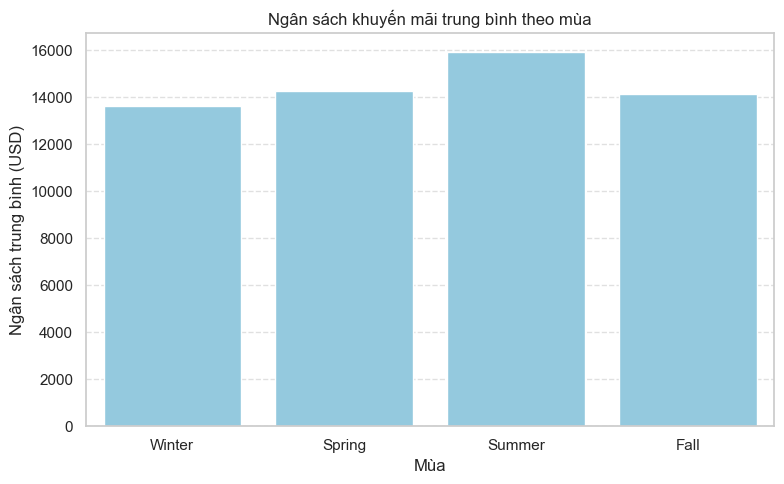

In [53]:
seasonal_budget = promo_only.groupby('Season')['Budget_USD'].mean().reset_index()

# order categories and sort
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_budget['Season'] = pd.Categorical(seasonal_budget['Season'], categories=season_order, ordered=True)
seasonal_budget = seasonal_budget.sort_values('Season')

plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_budget, x='Season', y='Budget_USD', color='skyblue')
plt.title('Ngân sách khuyến mãi trung bình theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Ngân sách trung bình (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Overall Correlation between Promotional Budget and Sales

In [55]:
from scipy.stats import ttest_ind, pearsonr
x = merged_df['Budget_USD']
y = merged_df['New_Sales']
corr, p_value = pearsonr(x, y)
print("Pearson Correlation between Budget and New Sales:")
print("r =", round(corr, 3))
print("p-value =", round(p_value, 4))

Pearson Correlation between Budget and New Sales:
r = 0.422
p-value = 0.0


Pearson Correlation giữa Budget và Sales theo từng loại khuyến mãi:
→ Bundle: r = 0.16, p = 0.423
→ Discount: r = 0.28, p = 0.190
→ Cashback: r = 0.97, p = 0.168
Correlation CHUNG giữa Budget và Sales:
→ Pearson r = 0.24, p-value = 0.0829


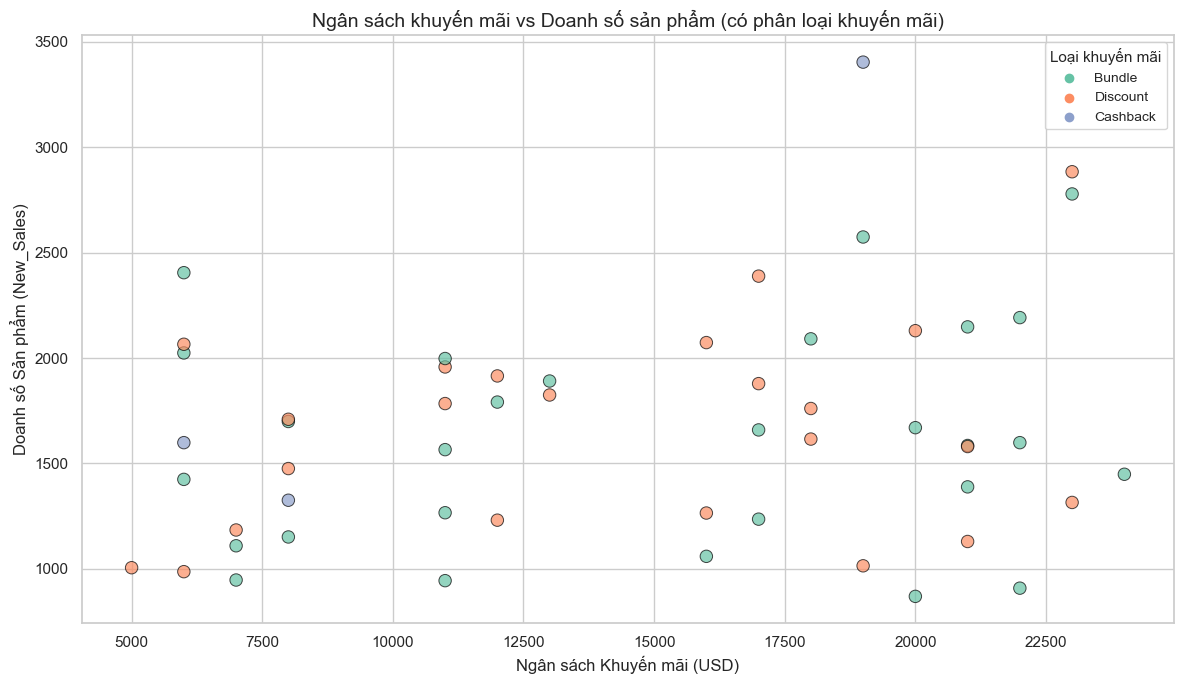

In [56]:
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid', palette='Set2')

sns.scatterplot(
data=promo_only,
x='Budget_USD',
y='New_Sales',
hue='Promo_Type',
alpha=0.7,
edgecolor='black',
s=80
)

print("Pearson Correlation giữa Budget và Sales theo từng loại khuyến mãi:")
for promo in promo_only['Promo_Type'].unique():
    df_sub = promo_only[promo_only['Promo_Type'] == promo]
    if len(df_sub) >= 2:
        r, p = pearsonr(df_sub['Budget_USD'], df_sub['New_Sales'])
        print(f"→ {promo}: r = {r:.2f}, p = {p:.3f}")
    else:
        print(f"→ {promo}: Không đủ dữ liệu")

df_corr = promo_only.dropna(subset=['Budget_USD', 'New_Sales'])

r_all, p_all = pearsonr(df_corr['Budget_USD'], df_corr['New_Sales'])

print(f"Correlation CHUNG giữa Budget và Sales:")
print(f"→ Pearson r = {r_all:.2f}, p-value = {p_all:.4f}")

plt.title("Ngân sách khuyến mãi vs Doanh số sản phẩm (có phân loại khuyến mãi)", fontsize=14)
plt.xlabel("Ngân sách Khuyến mãi (USD)", fontsize=12)
plt.ylabel("Doanh số Sản phẩm (New_Sales)", fontsize=12)
plt.legend(title="Loại khuyến mãi", title_fontsize=11, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

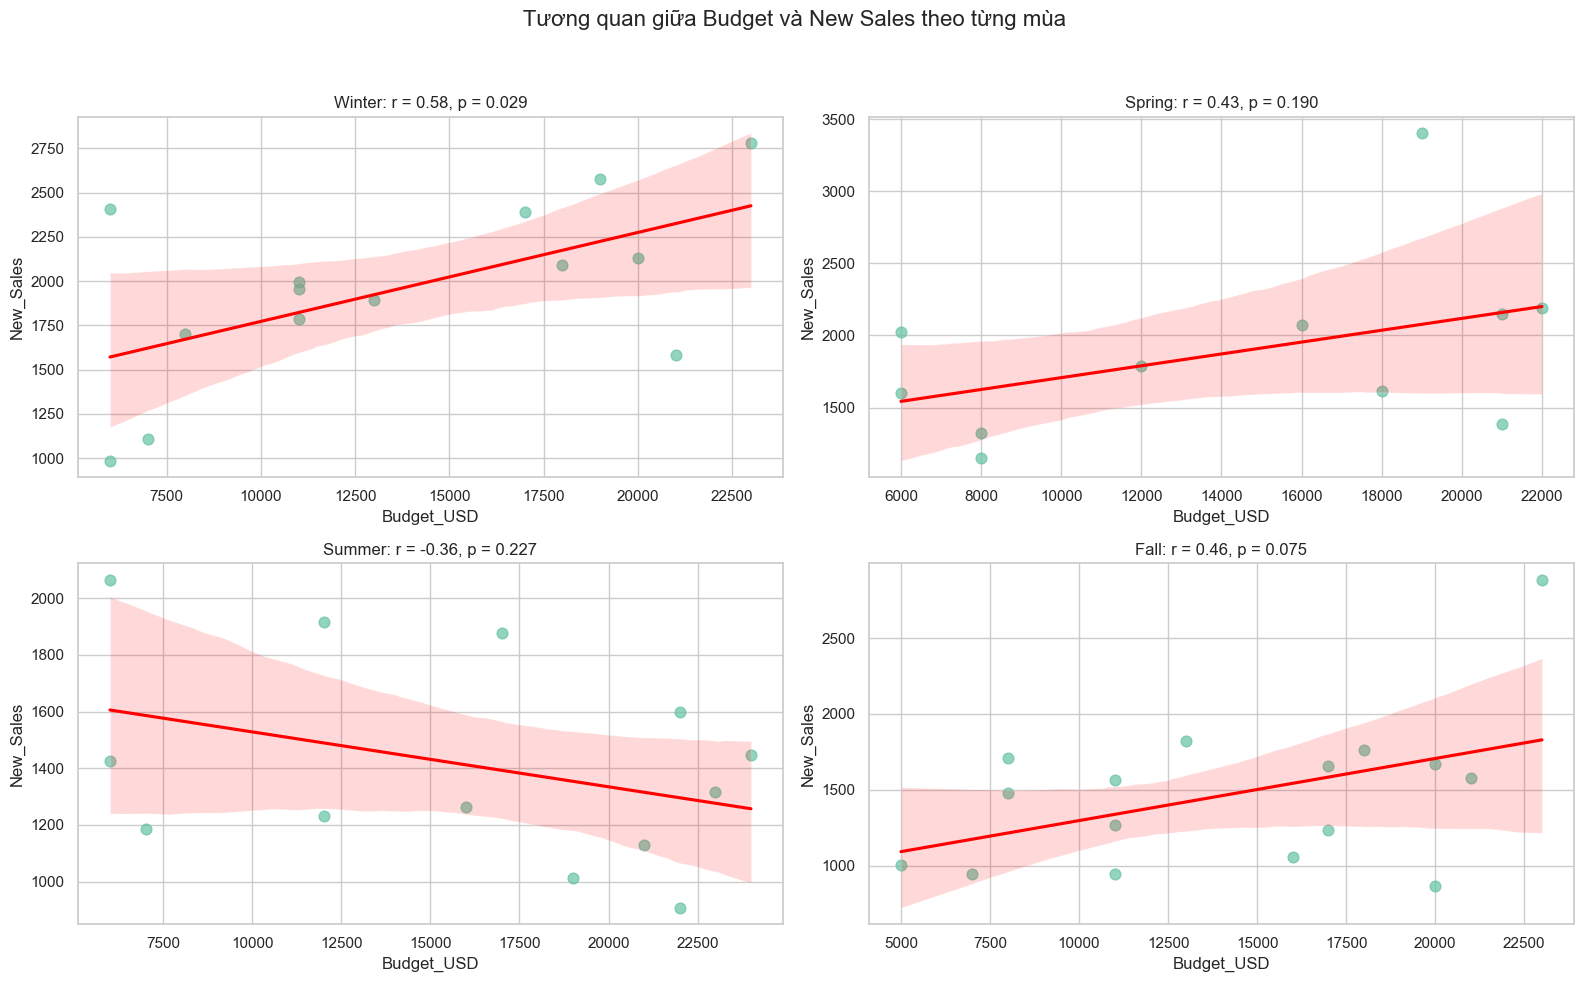

In [61]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(16, 10))
for i, season in enumerate(seasons, 1):
    subset = promo_only[promo_only['Season'] == season]

    if len(subset) >= 2:
        r, p = pearsonr(subset['Budget_USD'], subset['New_Sales'])
        title = f"{season}: r = {r:.2f}, p = {p:.3f}"
    else:
        title = f"{season}: Không đủ dữ liệu"

    plt.subplot(2, 2, i)
    sns.regplot(
        data=subset,
        x='Budget_USD',
        y='New_Sales',
        scatter_kws={'s': 60, 'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(title)
    plt.xlabel('Budget_USD')
    plt.ylabel('New_Sales')
    plt.grid(True)

plt.suptitle(' Tương quan giữa Budget và New Sales theo từng mùa', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [64]:
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)

overall_mean_sales = df['New_Sales'].mean()
cashback_df = df[df['Promo_t'] == 'Cashback'].copy()
cashback_df['Was_Weak_Before'] = cashback_df['Sales_t-1'] < overall_mean_sales
cashback_df['Sales_Improved'] = cashback_df['New_Sales'] > cashback_df['Sales_t-1']

total_cashbacks = len(cashback_df)
weak_before = cashback_df['Was_Weak_Before'].sum()
improved = cashback_df['Sales_Improved'].sum()
both_conditions = ((cashback_df['Was_Weak_Before']) & (cashback_df['Sales_Improved'])).sum()

print(" PHÂN TÍCH CASHBACK:")
print(f"Tổng lần xuất hiện Cashback: {total_cashbacks}")
print(f"Trước đó có dấu hiệu 'ế' (< trung bình): {weak_before} ({weak_before/total_cashbacks:.0%})")
print(f"Doanh số tăng sau Cashback: {improved} ({improved/total_cashbacks:.0%})")
print(f"Cả 2 điều kiện đúng: {both_conditions} ({both_conditions/total_cashbacks:.0%})")

cashback_detail = cashback_df[['Year', 'Month', 'Sales_t-1', 'New_Sales', 'Was_Weak_Before', 'Sales_Improved']]

# So sánh % tăng doanh số với các khuyến mãi khác
df_promo = df[df['Promo_t'] != 'Non_Promo'].dropna(subset=['Sales_t-1'])
df_promo['Sales_Growth_%'] = ((df_promo['New_Sales'] - df_promo['Sales_t-1']) / df_promo['Sales_t-1']) * 100

growth_summary = df_promo.groupby('Promo_t')['Sales_Growth_%'].agg(['mean', 'std', 'count']).round(2)
print("\n Trung bình % tăng doanh số theo loại khuyến mãi:")
print(growth_summary)

cashback_growth = df_promo[df_promo['Promo_t'] == 'Cashback']['Sales_Growth_%']
discount_growth = df_promo[df_promo['Promo_t'] == 'Discount']['Sales_Growth_%']
bundle_growth = df_promo[df_promo['Promo_t'] == 'Bundle']['Sales_Growth_%']

print("\n So sánh Cashback vs Discount:")
t_stat1, p_val1 = ttest_ind(cashback_growth, discount_growth, equal_var=False)
print(f"  ➤ t = {t_stat1:.2f}, p = {p_val1:.4f}")

print("\n So sánh Cashback vs Bundle:")
t_stat2, p_val2 = ttest_ind(cashback_growth, bundle_growth, equal_var=False)
print(f"  ➤ t = {t_stat2:.2f}, p = {p_val2:.4f}")


df['Season'] = df['Month'].apply(get_season)
cashback_years = cashback_df['Year'].unique()

print("\n Kiểm tra các năm dùng Cashback có bị 'ế' vào mùa đông trước đó không:")
winter_check = []

for year in cashback_years:
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    avg_winter_sales = winter_months['New_Sales'].mean()
    is_weak = avg_winter_sales < overall_mean_sales

    winter_check.append({
        'Year': year,
        'Winter Avg Sales': round(avg_winter_sales, 2),
        'Is Winter Weak?': is_weak
    })

winter_df = pd.DataFrame(winter_check)
print(winter_df)

# Xếp hạng mức độ 'ế' của các mùa đông toàn kỳ
all_winters = []

for year in df['Year'].unique():
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    if not winter_months.empty:
        avg_sales = winter_months['New_Sales'].mean()
        all_winters.append({
            'Year': year,
            'Winter Avg Sales': avg_sales
        })

all_winters_df = pd.DataFrame(all_winters)
all_winters_df['Winter Rank (Low=1)'] = all_winters_df['Winter Avg Sales'].rank(method='min', ascending=True).astype(int)
all_winters_df['Used Cashback After?'] = all_winters_df['Year'].isin(cashback_years)

print("\n Xếp hạng mức độ 'ế' của các mùa đông toàn kỳ:")
print(tabulate(all_winters_df.sort_values('Winter Rank (Low=1)')[['Year', 'Winter Avg Sales', 'Winter Rank (Low=1)', 'Used Cashback After?']], headers='keys', tablefmt='fancy_grid'))


 PHÂN TÍCH CASHBACK:
Tổng lần xuất hiện Cashback: 3
Trước đó có dấu hiệu 'ế' (< trung bình): 2 (67%)
Doanh số tăng sau Cashback: 3 (100%)
Cả 2 điều kiện đúng: 2 (67%)

 Trung bình % tăng doanh số theo loại khuyến mãi:
           mean    std  count
Promo_t                      
Bundle    33.30  24.12     28
Cashback  36.63  13.19      3
Discount  45.62  22.02     23

 So sánh Cashback vs Discount:
  ➤ t = -1.01, p = 0.3742

 So sánh Cashback vs Bundle:
  ➤ t = 0.37, p = 0.7285

 Kiểm tra các năm dùng Cashback có bị 'ế' vào mùa đông trước đó không:
   Year  Winter Avg Sales  Is Winter Weak?
0  2002            929.23             True
1  2006           1095.09             True
2  2024           1978.52            False

 Xếp hạng mức độ 'ế' của các mùa đông toàn kỳ:
╒════╤════════╤════════════════════╤═══════════════════════╤════════════════════════╕
│    │   Year │   Winter Avg Sales │   Winter Rank (Low=1) │ Used Cashback After?   │
╞════╪════════╪════════════════════╪═══════════════════

### Year-on-Year Growth Evaluation

Yearly Sales Growth:


,Year,Total Sales,Growth Rate (%)
0,1995,9543.87,NaN
1,1996,8611.59,-9.77
2,1997,9621.38,11.73
3,1998,9559.16,-0.65
4,1999,11138.17,16.52
5,2000,10384.99,-6.76
6,2001,10615.48,2.22
7,2002,10937.18,3.03
8,2003,11271.31,3.06
9,2004,12819.39,13.73


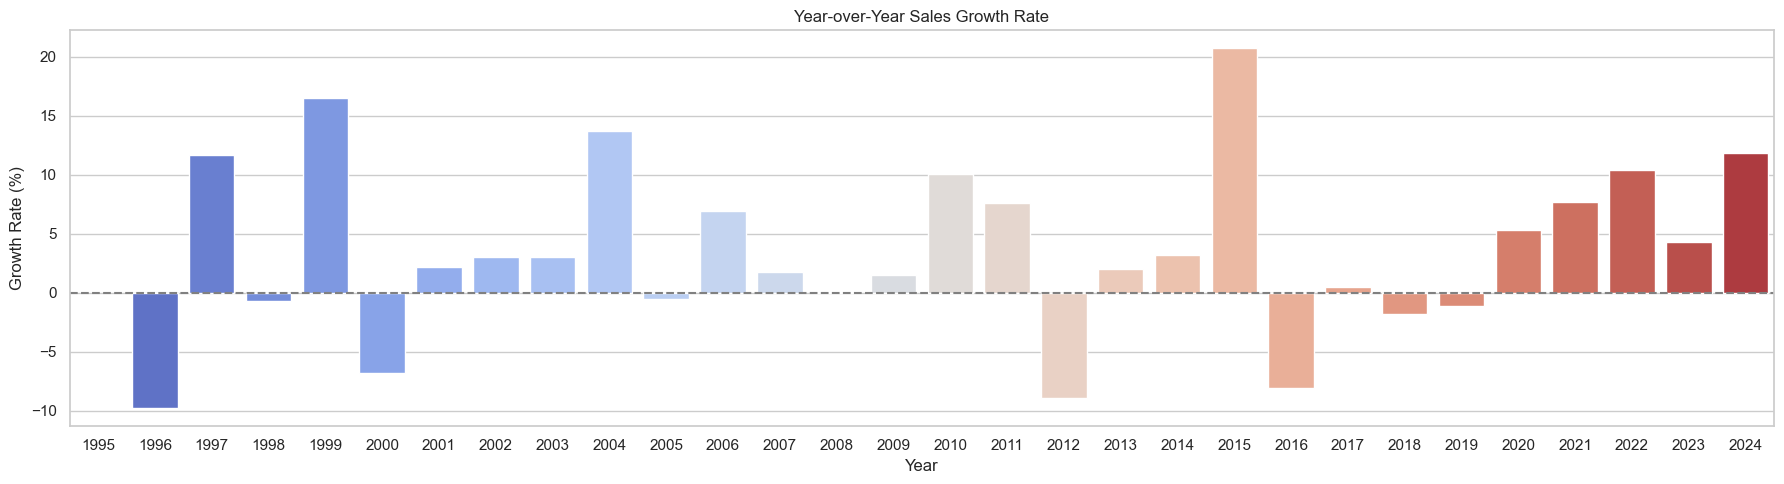

In [65]:
yearly_total_sales = merged_df.groupby('Year')['New_Sales'].sum()
growth_rate = yearly_total_sales.pct_change() * 100

growth_df = pd.DataFrame({
'Year': yearly_total_sales.index,
'Total Sales': yearly_total_sales.values,
'Growth Rate (%)': growth_rate.values
})

print("Yearly Sales Growth:")
display(growth_df.round(2))

plt.figure(figsize=(18,5))
sns.barplot(x=growth_df['Year'], y=growth_df['Growth Rate (%)'], palette="coolwarm")
plt.title("Year-over-Year Sales Growth Rate")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()